In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import plotly as pt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('Q1.csv')

In [4]:
df

Day  Jan   Feb  Mar   Apr  May   Jun  Jul  Aug  Sept  Oct   Nov  Dec
0     1   33  32.0   16  25.0   21  20.0   29   26   6.0   23  18.0   11
1     2   37  22.0   14  26.0   30  11.0   36   33  18.0   13  16.0    9
2     3   23  22.0   12  26.0   31  22.0   68   21  13.0   13  20.0   12
3     4   28  38.0   14  30.0   28  21.0   32   21   8.0    9  15.0   15
4     5   41  10.0   13  27.0   31  21.0   24   19   9.0    9  12.0   18
5     6   37  34.0   23  24.0   35  27.0   22   19  22.0    5  12.0   17
6     7   23  32.0   15  20.0   26  58.0   22   15  38.0    6  12.0   19
7     8   24  33.0   22  25.0   39  40.0   31   20  11.0   10  39.0    6
8     9   22  42.0   17  22.0   13  25.0   32   25  10.0    5   8.0   10
9    10   28  19.0   22  15.0   21  24.0   21   11   8.0   10  16.0    9
10   11   27  29.0   28  12.0   20  26.0   24   13   9.0   10  14.0   10
11   12   16  28.0   11  18.0   41  24.0   20   14  10.0    5  12.0   12
12   13   18  31.0   41  30.0   25  32.0   23   26  12.0    4  13.0    9
13   14   24  29.0   30  23.0   25   9.0   24   19  14.0   16  15.0   11
14   15   21  20.0   34  23.0   21  13.0   26   21  15.0    7  16.0   14
15   16   26  21.0   24  33.0   20  12.0   23   16   9.0    8  14.0    8
16   17   21  12.0   19  38.0   19  15.0   22    7  18.0   11  18.0    9
17   18   31  37.0   35  31.0   21  20.0   28   13  20.0    8  15.0    4
18   19   28  25.0   27  31.0   18  24.0   14   10  29.0   11  12.0   17
19   20   13  19.0   20  32.0   24  20.0   28   10  33.0    5  10.0   21
20   21   14  16.0   60  36.0   42   9.0   36   11  14.0   10  16.0   28
21   22   30  23.0   68  24.0   28   8.0   50   11  11.0   15  18.0   42
22   23   41   9.0   46  20.0   35  15.0   24   14  26.0   47  10.0   22
23   24   30  17.0   27  20.0   25  20.0   22   11  34.0   20  11.0   16
24   25   47  20.0   23  22.0   11  19.0   24   16  38.0   13   3.0    9
25   26   33  24.0   26  25.0   22  28.0   26   13  40.0   28   9.0   12
26   27   41  28.0   26  25.0   25  29.0   11   12  41.0   41   8.0    9
27   28   44  13.0   42  24.0   23  25.0   19   20  18.0   29   9.0    7
28   29   30   NaN   20  33.0   27  28.0   21   10  28.0   29  29.0   10
29   30   15   NaN   21  13.0   33  25.0   21   13  38.0   18  11.0    7
30   31   32   NaN   22   NaN   26   NaN   24   14   NaN   25   NaN   12

In [5]:
df.isnull().sum()

Day     0
Jan     0
Feb     3
Mar     0
Apr     1
May     0
Jun     1
Jul     0
Aug     0
Sept    1
Oct     0
Nov     1
Dec     0
dtype: int64

In [6]:
df.describe()

Day        Jan        Feb        Mar        Apr        May  \
count  31.000000  31.000000  28.000000  31.000000  30.000000  31.000000   
mean   16.000000  28.322581  24.464286  26.387097  25.100000  26.000000   
std     9.092121   8.990317   8.655900  13.365821   6.326463   7.411702   
min     1.000000  13.000000   9.000000  11.000000  12.000000  11.000000   
25%     8.500000  22.500000  19.000000  18.000000  22.000000  21.000000   
50%    16.000000  28.000000  23.500000  23.000000  25.000000  25.000000   
75%    23.500000  33.000000  31.250000  29.000000  30.000000  30.500000   
max    31.000000  47.000000  42.000000  68.000000  38.000000  42.000000   

             Jun        Jul        Aug       Sept        Oct        Nov  \
count  30.000000  31.000000  31.000000  30.000000  31.000000  30.000000   
mean   22.333333  26.677419  16.258065  20.000000  14.935484  14.366667   
std     9.963150  10.447925   5.932778  11.437989  10.708051   6.599286   
min     8.000000  11.000000   7.000000   6.000000   4.000000   3.000000   
25%    16.000000  22.000000  11.500000  10.250000   8.000000  11.000000   
50%    21.500000  24.000000  14.000000  16.500000  11.000000  13.500000   
75%    25.750000  28.500000  20.000000  28.750000  19.000000  16.000000   
max    58.000000  68.000000  33.000000  41.000000  47.000000  39.000000   

             Dec  
count  31.000000  
mean   13.387097  
std     7.472962  
min     4.000000  
25%     9.000000  
50%    11.000000  
75%    16.500000  
max    42.000000

<AxesSubplot:>

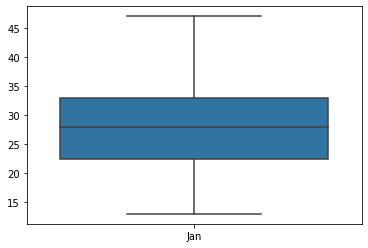

In [7]:
sns.boxplot(df[['Jan']])

In [8]:
ct = ColumnTransformer([
    ('tf1',SimpleImputer(),[2,4,6,9,11])
])

In [9]:
trf_cols = pd.DataFrame(ct.fit_transform(df)).round(1)

In [10]:
trf_cols

0     1     2     3     4
0   32.0  25.0  20.0   6.0  18.0
1   22.0  26.0  11.0  18.0  16.0
2   22.0  26.0  22.0  13.0  20.0
3   38.0  30.0  21.0   8.0  15.0
4   10.0  27.0  21.0   9.0  12.0
5   34.0  24.0  27.0  22.0  12.0
6   32.0  20.0  58.0  38.0  12.0
7   33.0  25.0  40.0  11.0  39.0
8   42.0  22.0  25.0  10.0   8.0
9   19.0  15.0  24.0   8.0  16.0
10  29.0  12.0  26.0   9.0  14.0
11  28.0  18.0  24.0  10.0  12.0
12  31.0  30.0  32.0  12.0  13.0
13  29.0  23.0   9.0  14.0  15.0
14  20.0  23.0  13.0  15.0  16.0
15  21.0  33.0  12.0   9.0  14.0
16  12.0  38.0  15.0  18.0  18.0
17  37.0  31.0  20.0  20.0  15.0
18  25.0  31.0  24.0  29.0  12.0
19  19.0  32.0  20.0  33.0  10.0
20  16.0  36.0   9.0  14.0  16.0
21  23.0  24.0   8.0  11.0  18.0
22   9.0  20.0  15.0  26.0  10.0
23  17.0  20.0  20.0  34.0  11.0
24  20.0  22.0  19.0  38.0   3.0
25  24.0  25.0  28.0  40.0   9.0
26  28.0  25.0  29.0  41.0   8.0
27  13.0  24.0  25.0  18.0   9.0
28  24.5  33.0  28.0  28.0  29.0
29  24.5  13.0  25.0  38.0  11.0
30  24.5  25.1  22.3  20.0  14.4

In [11]:
df['Feb'] = trf_cols[0]
df['Apr'] = trf_cols[1]
df['Jun'] = trf_cols[2]
df['Sept'] = trf_cols[3]
df['Nov'] = trf_cols[4]

In [12]:
df.isnull().sum()

Day     0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64

In [13]:
df.set_index(['Day'],inplace=True)

Text(0.5, 1.0, 'Efluent suspended solids in different month of the year')

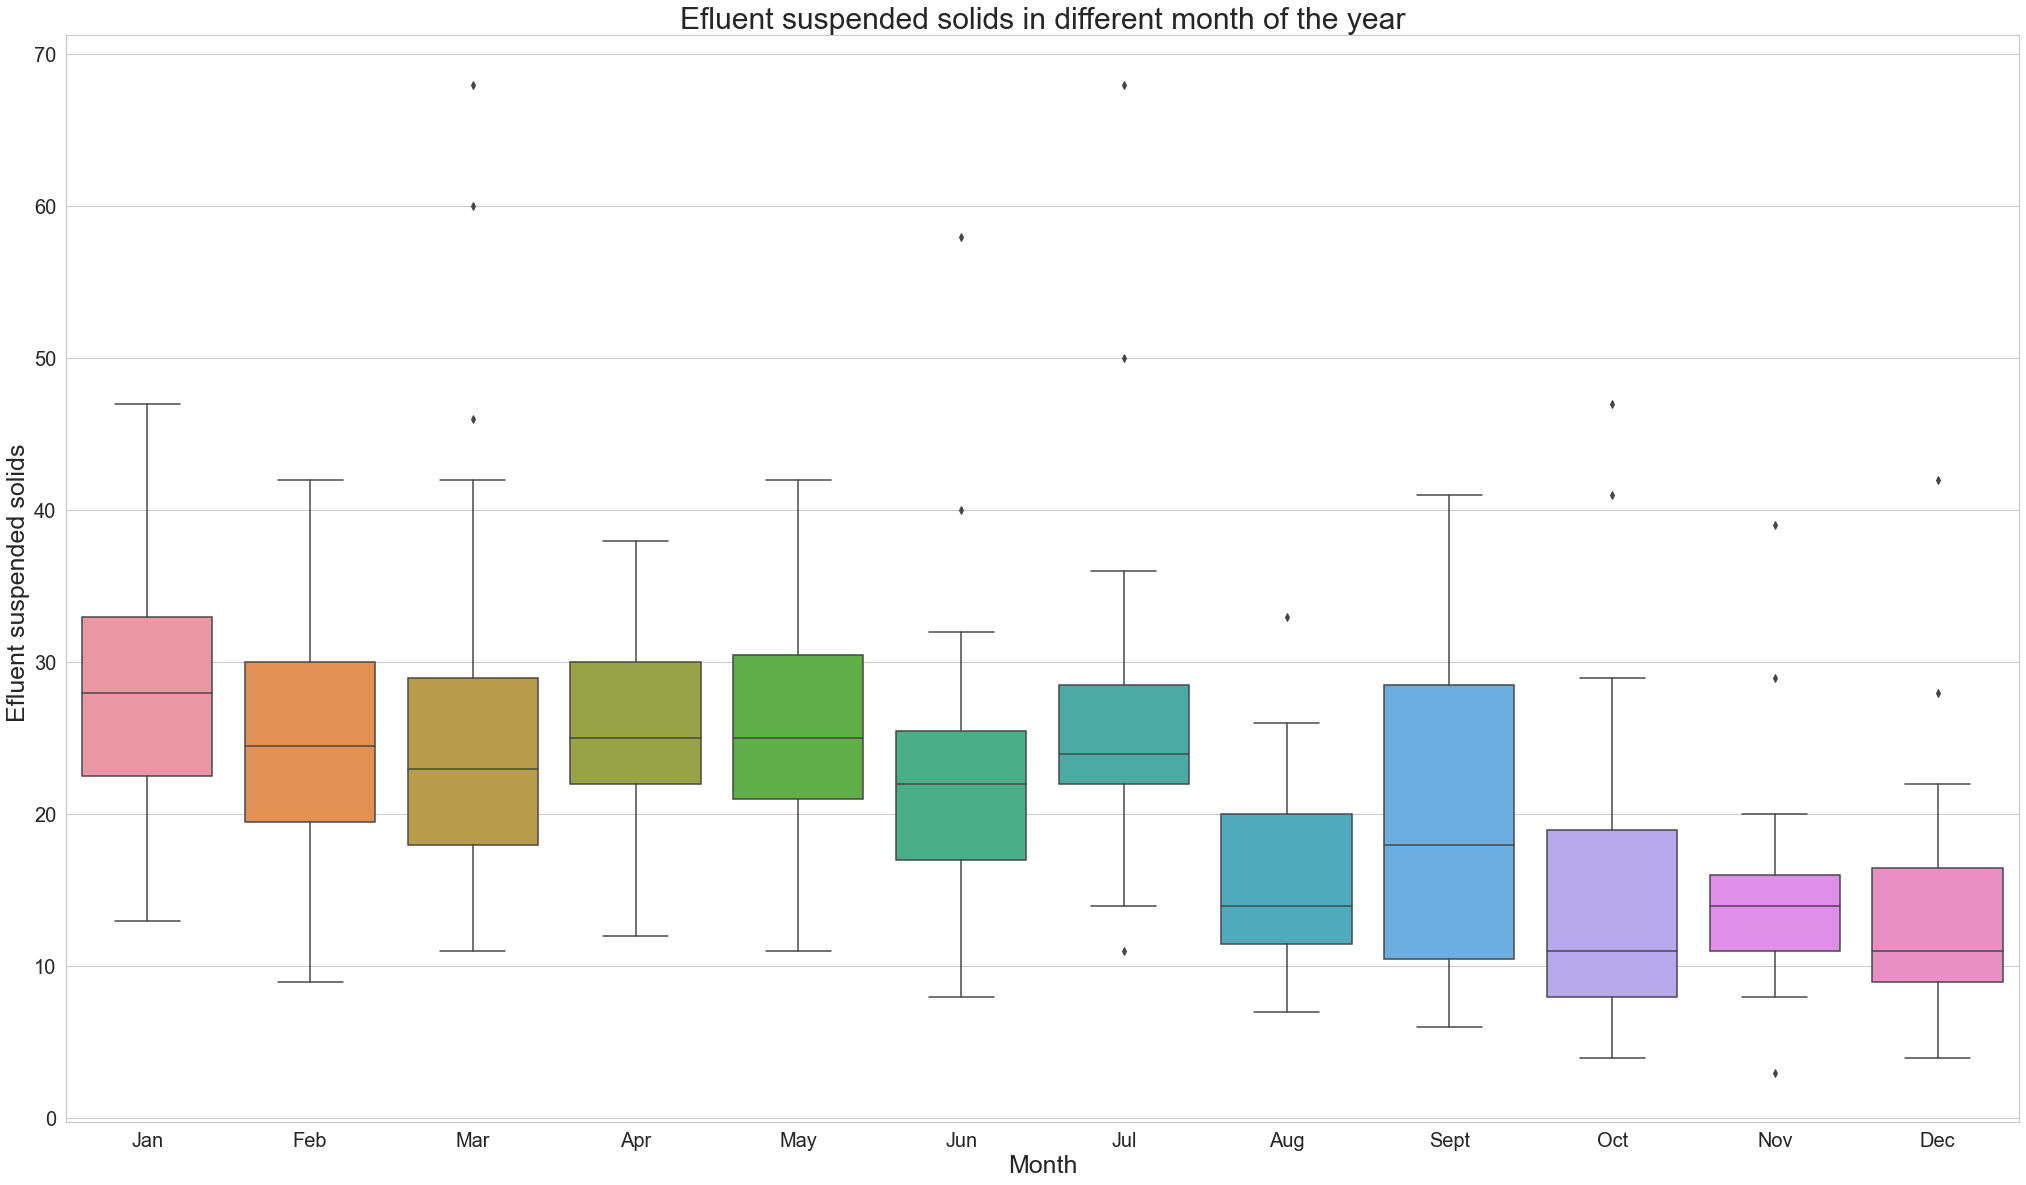

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (35,20))
ax = sns.boxplot(data = df)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Month',fontsize = 25)
plt.ylabel('Efluent suspended solids ',fontsize = 25)
plt.title('Efluent suspended solids in different month of the year',fontsize = 30)

## There are datas out side the bars , they can be possible outliers, or there may be some specific regions for thos values we will find out in this assisgnment. 

In [15]:
df.head()

Jan   Feb  Mar   Apr  May   Jun  Jul  Aug  Sept  Oct   Nov  Dec
Day                                                                 
1     33  32.0   16  25.0   21  20.0   29   26   6.0   23  18.0   11
2     37  22.0   14  26.0   30  11.0   36   33  18.0   13  16.0    9
3     23  22.0   12  26.0   31  22.0   68   21  13.0   13  20.0   12
4     28  38.0   14  30.0   28  21.0   32   21   8.0    9  15.0   15
5     41  10.0   13  27.0   31  21.0   24   19   9.0    9  12.0   18

In [16]:
def get_cmap(n, name='viridis'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

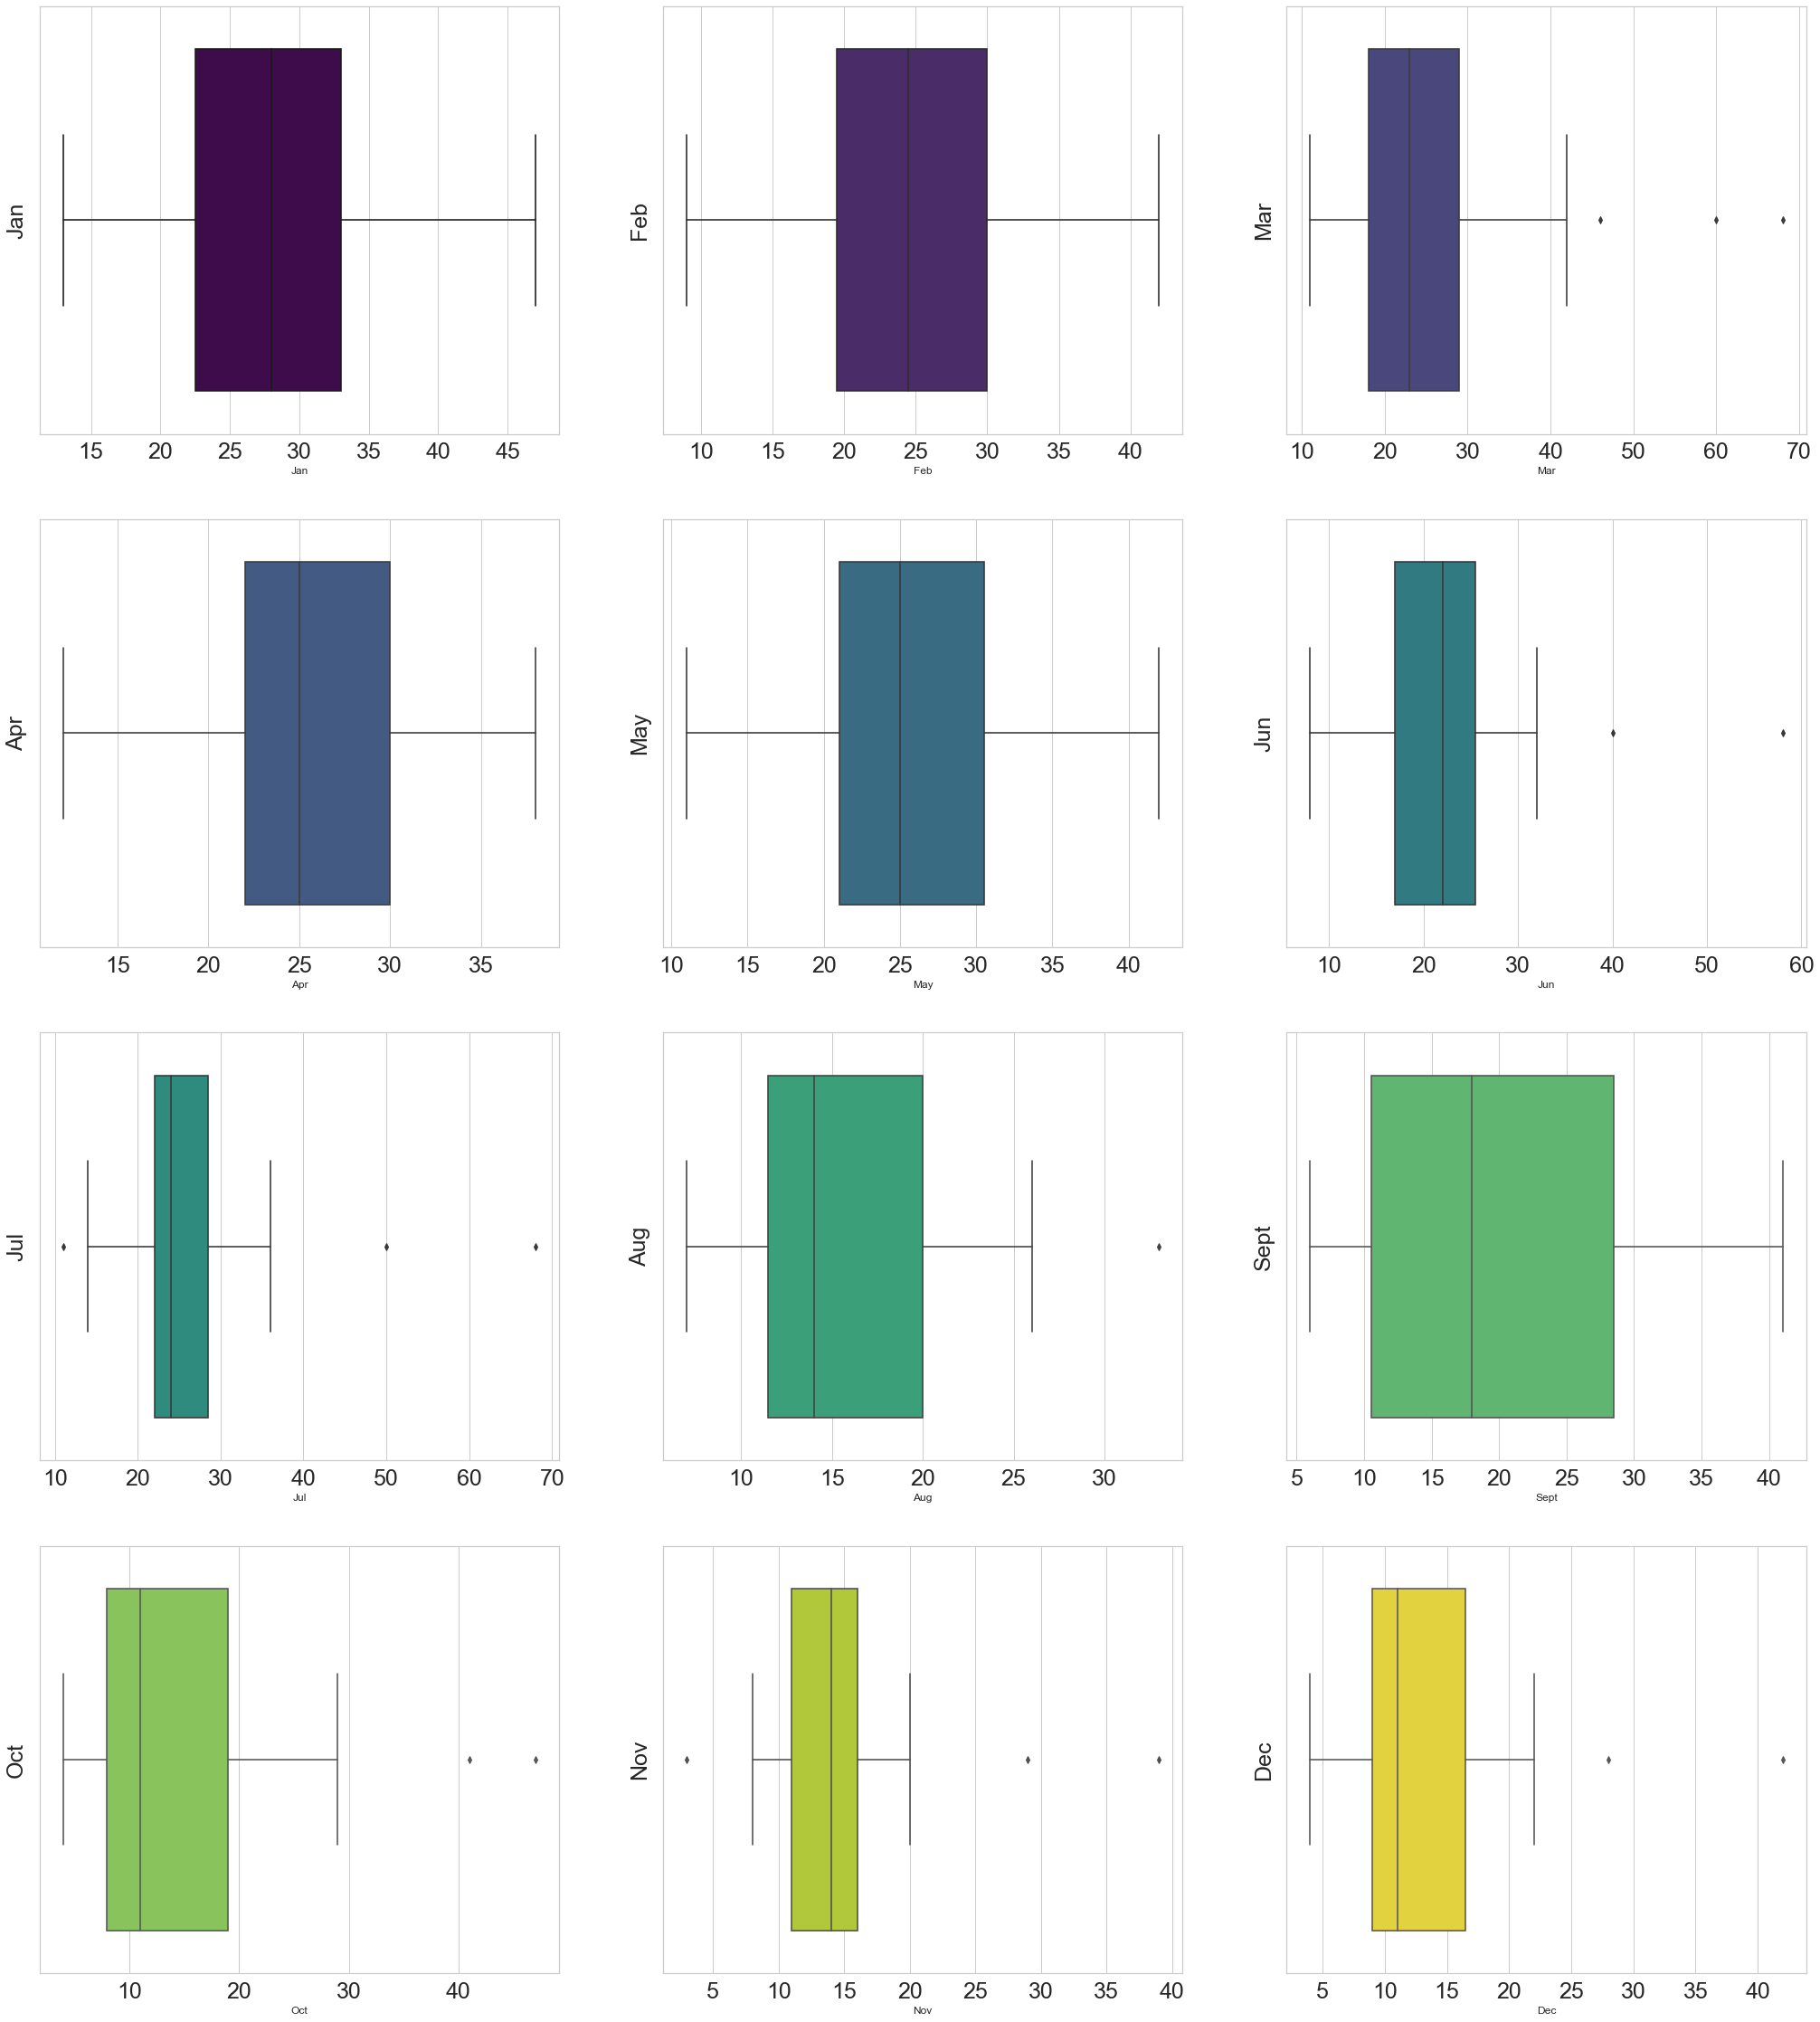

In [17]:
l = len(df.columns)
cols = df.columns
plt.figure(figsize = (35,40))
cmap = get_cmap(l)
for i in range(0,l):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x =cols[i],linewidth=1.6,color = cmap(i) )
    plt.ylabel(str(df.columns[i]),fontsize = 25)
    plt.xticks(fontsize = 25)
plt.savefig('box.png', bbox_inches='tight')


In [18]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\krishnendu\Desktop\sample_project\en

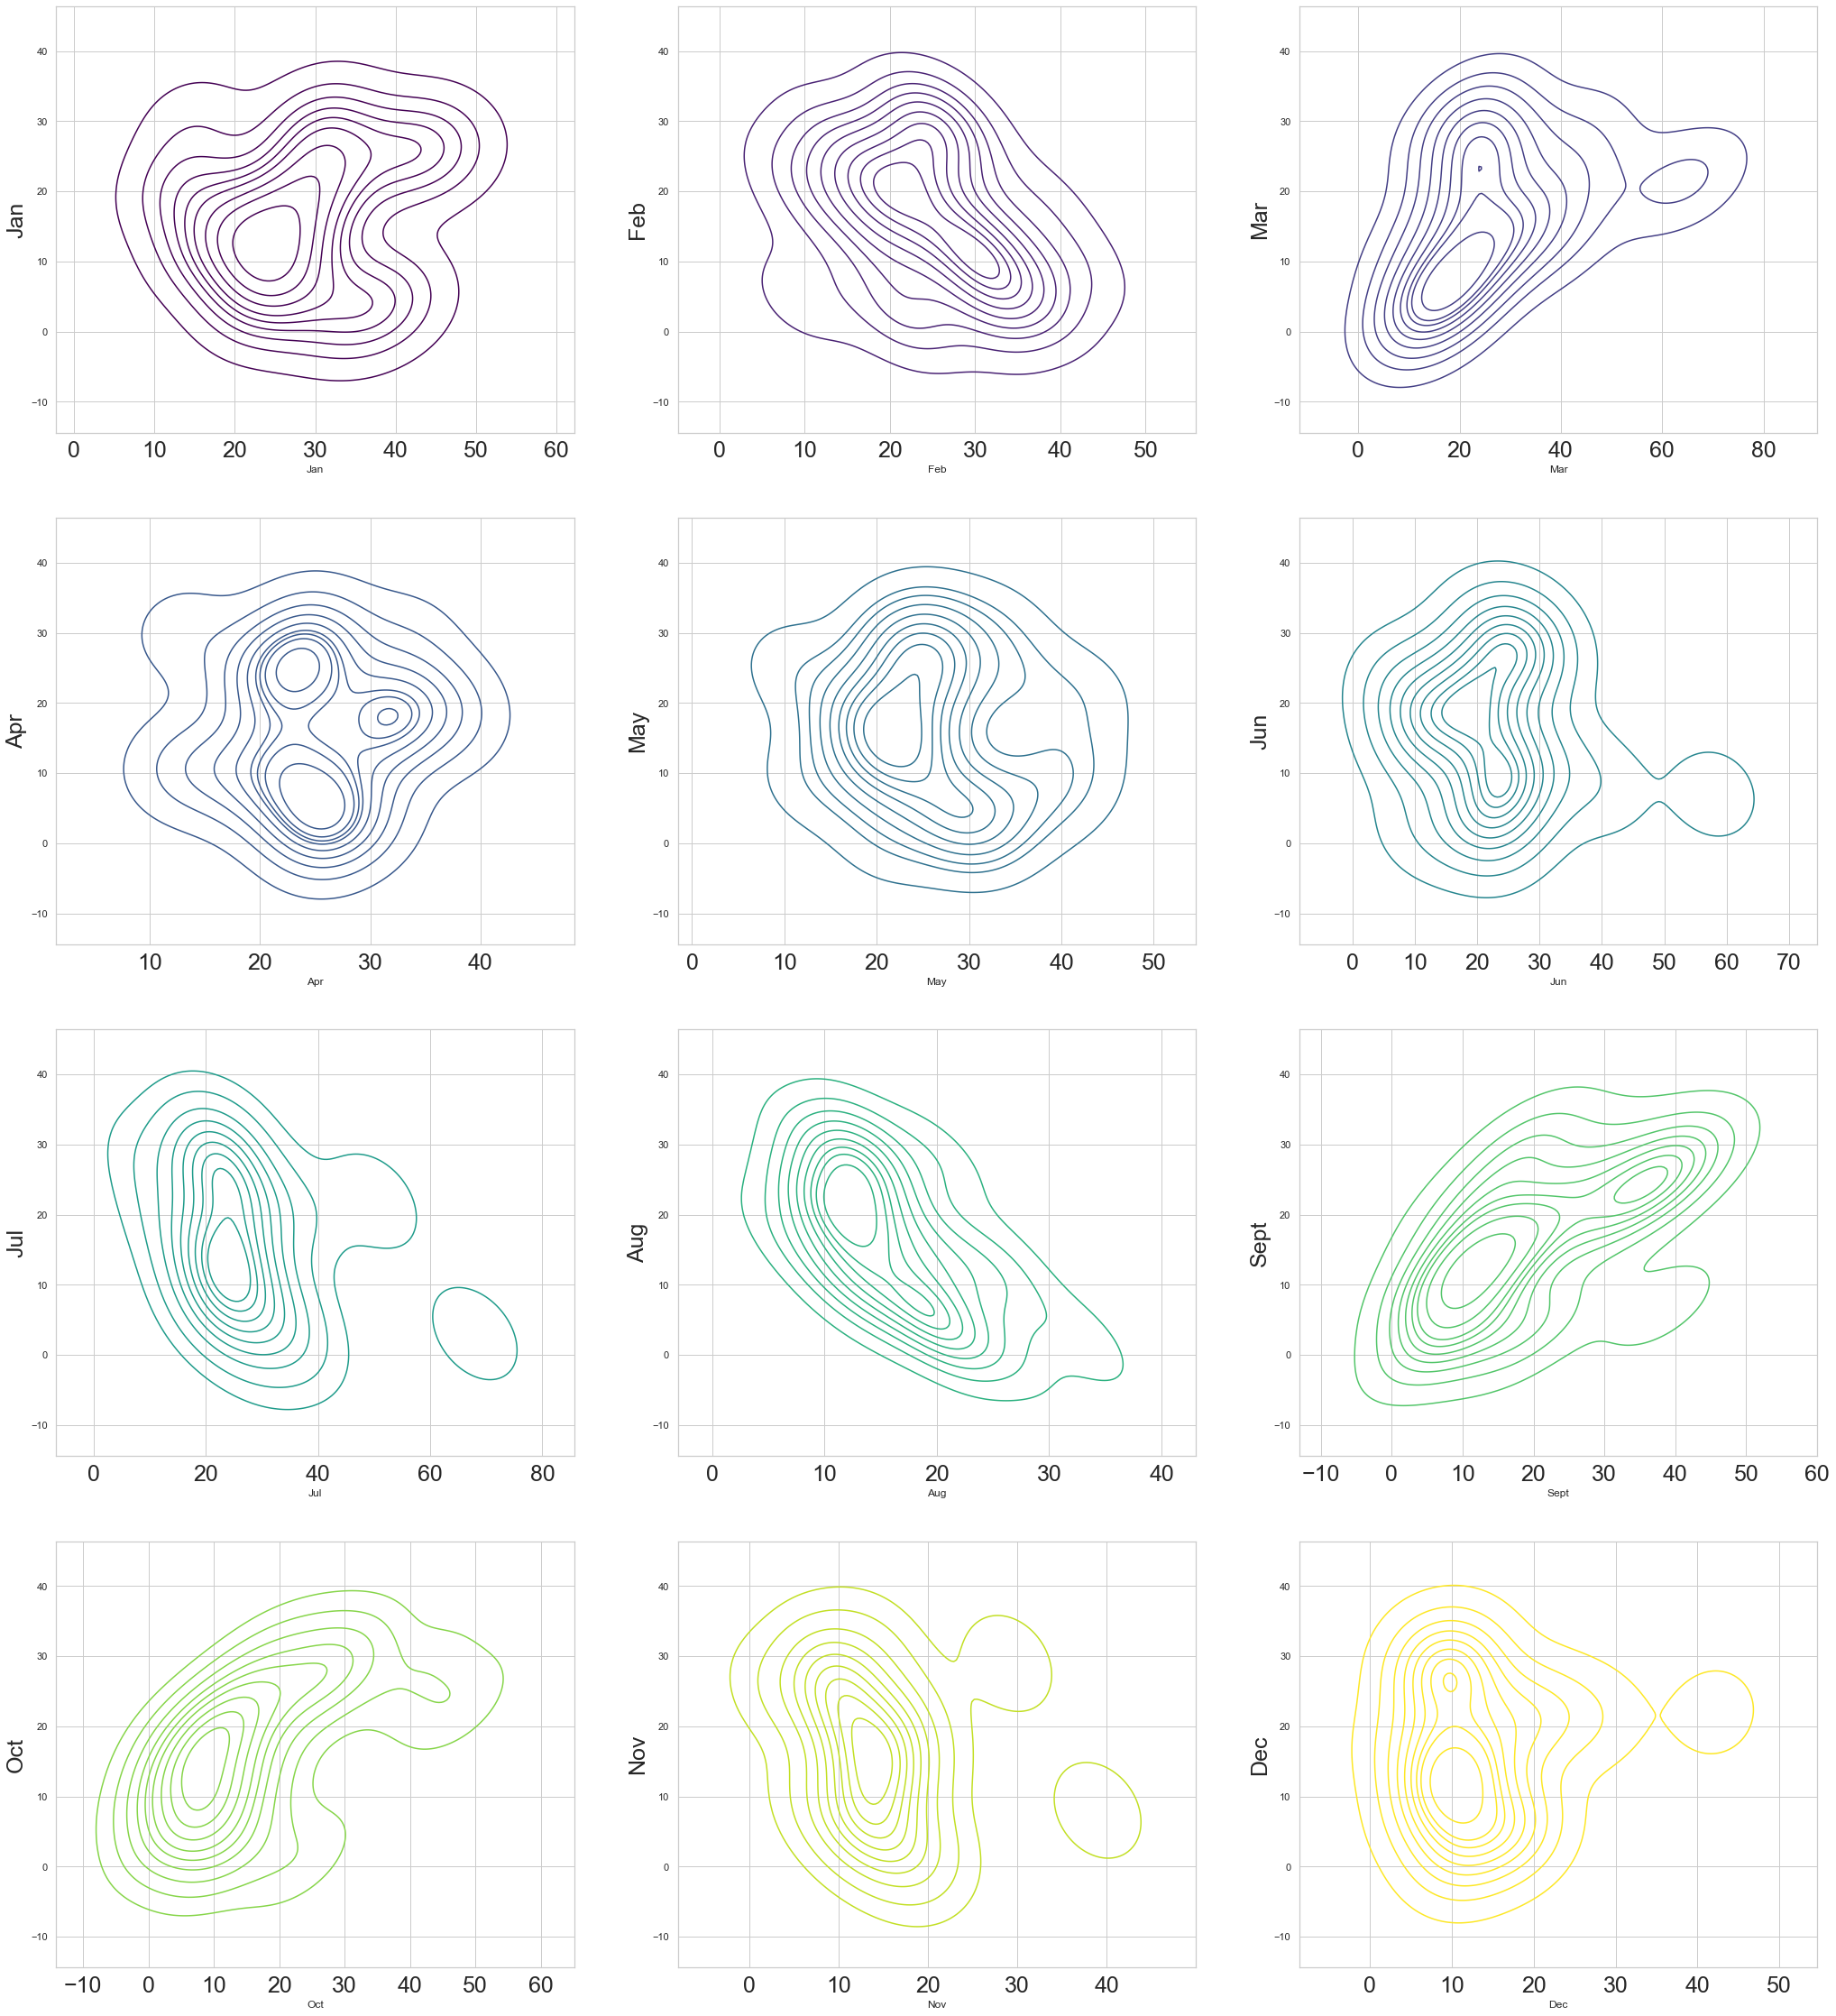

In [19]:
l = len(df.columns)
cols = df.columns
plt.figure(figsize = (35,40))
cmap = get_cmap(l)
for i in range(0,l):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data = df,x = cols[i],y = df.index,linewidth=1.6,color = cmap(i))
    plt.ylabel(str(df.columns[i]),fontsize = 25)
    plt.xticks(fontsize = 25)


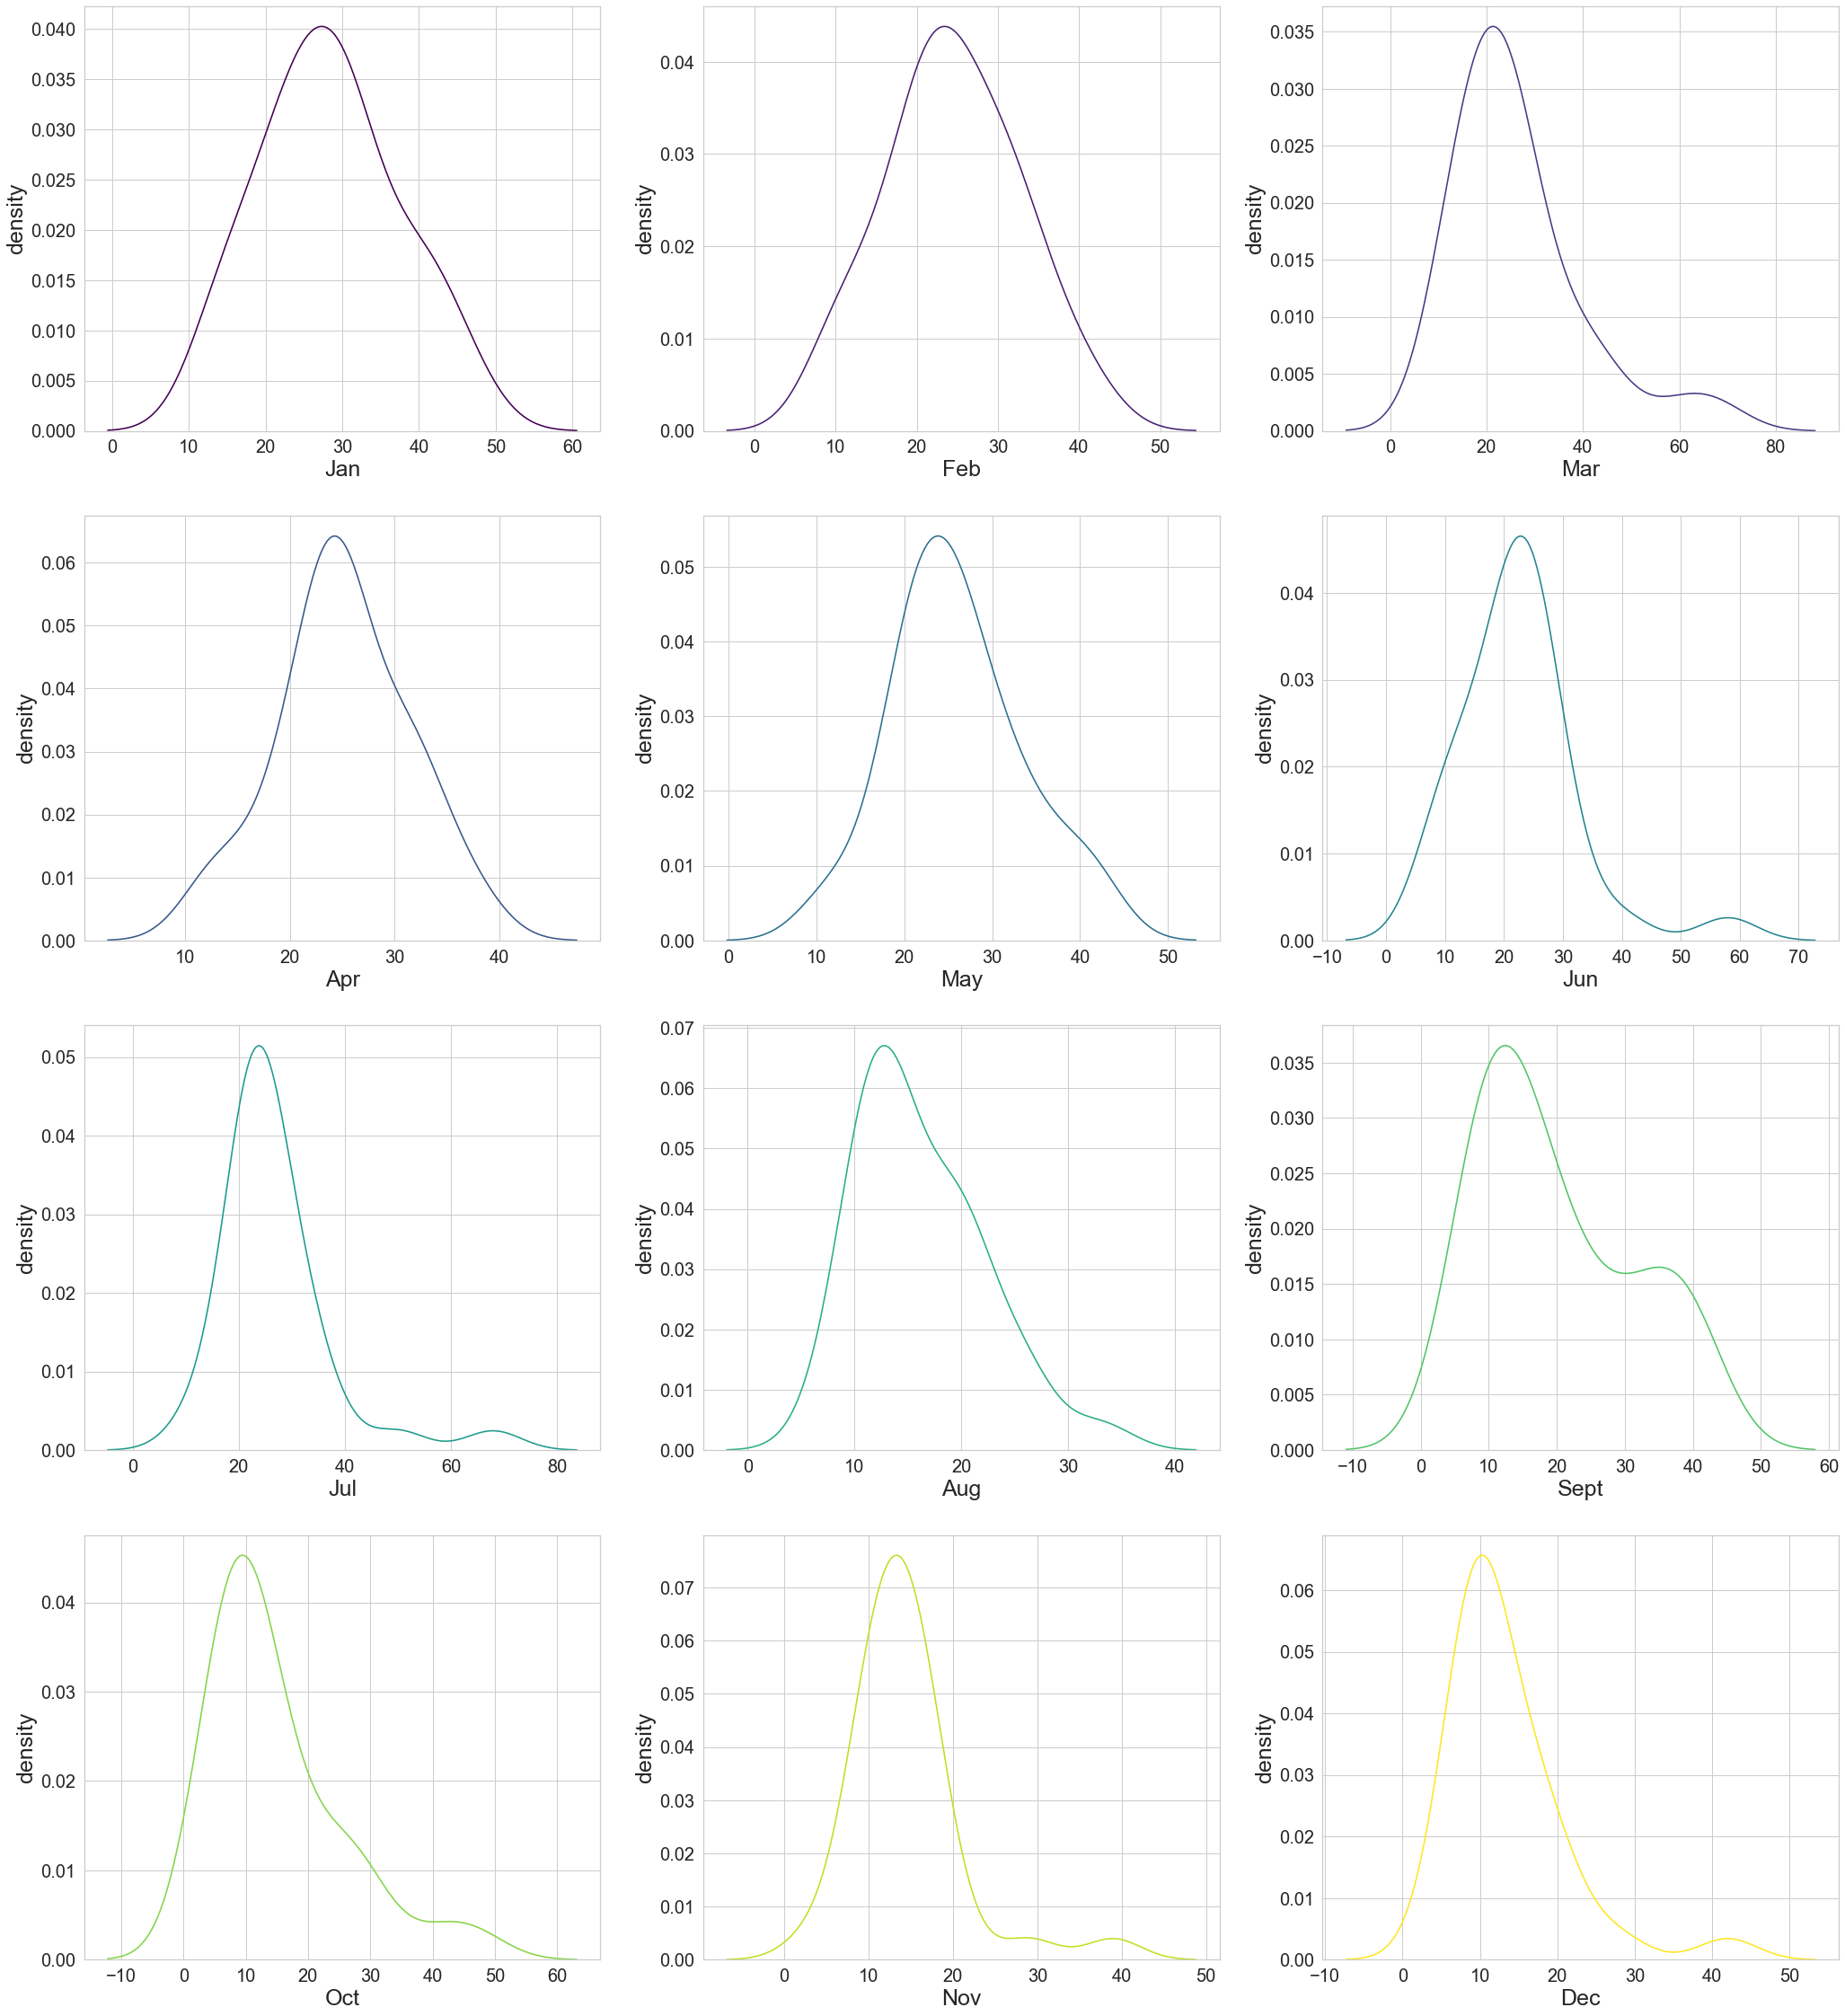

In [20]:
l = len(df.columns)
cols = df.columns
plt.figure(figsize = (35,40))
cmap = get_cmap(l)
for i in range(0,l):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data = df,x = cols[i],linewidth=1.6,color = cmap(i))
    plt.ylabel(str('density'),fontsize = 25)
    plt.xlabel(cols[i],fontsize = 25)
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

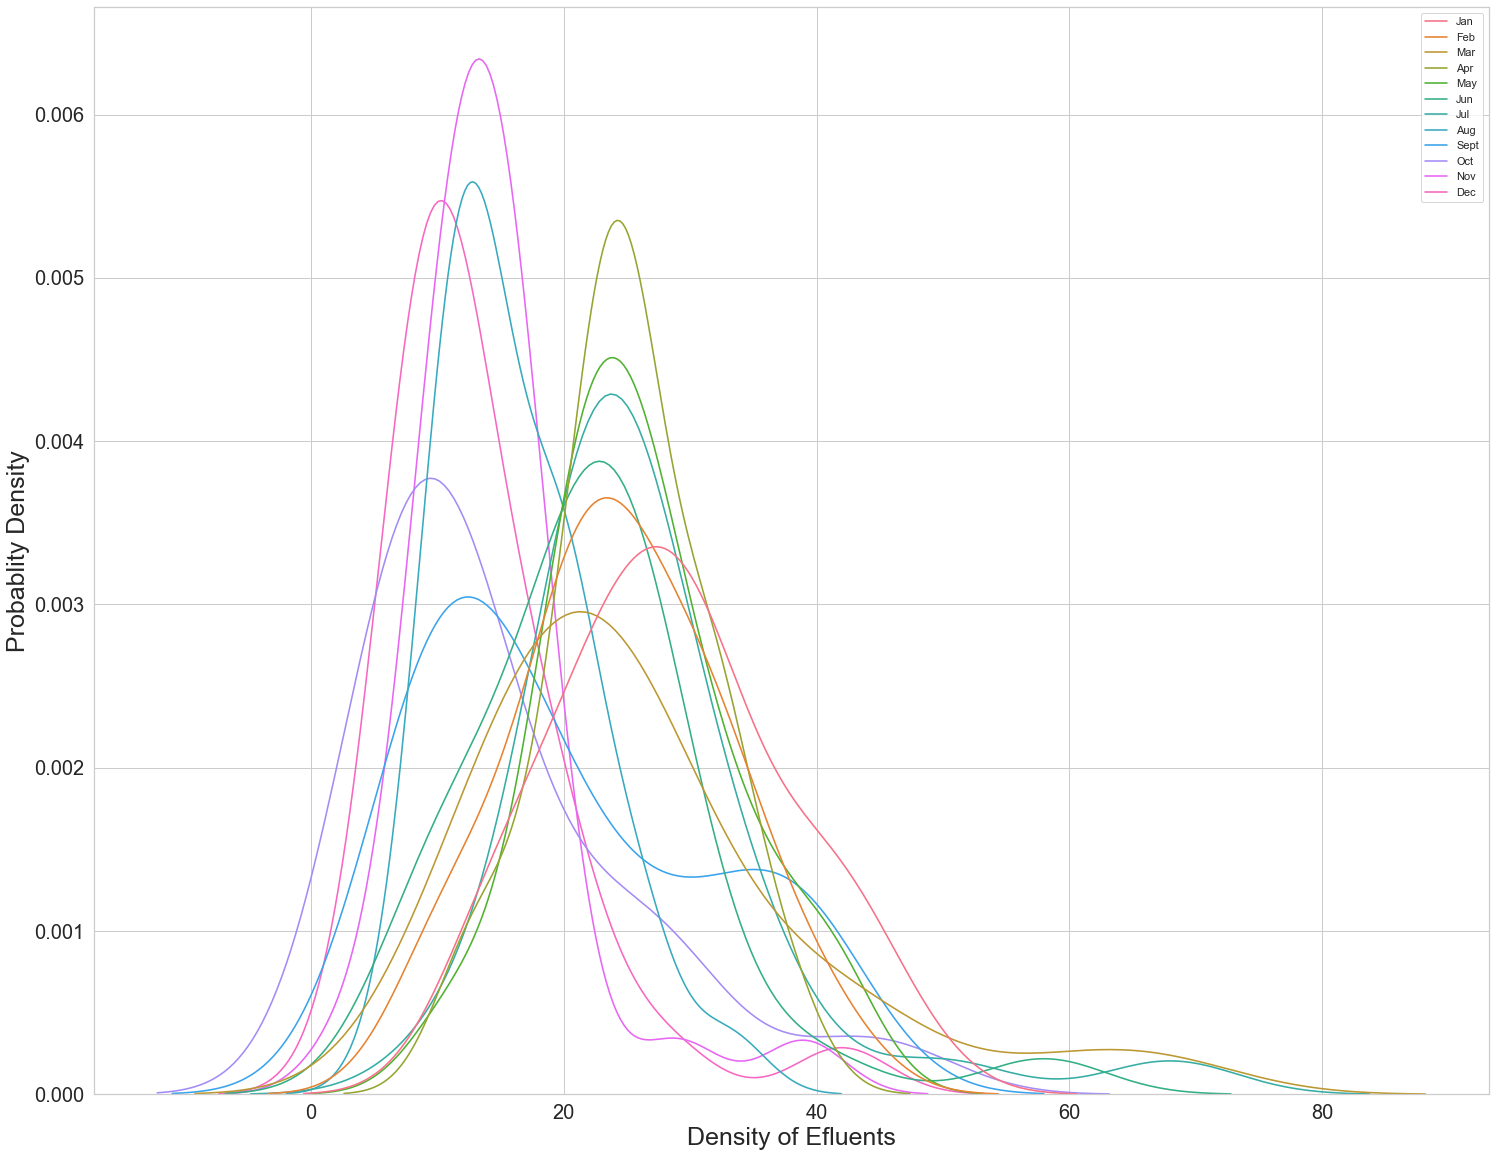

In [21]:
plt.figure(figsize = (25,20))
fig = sns.kdeplot(data = df,linewidth=1.6,color = cmap(i))
fig.set(xlabel = 'Density of Efluents', ylabel = 'Density')
plt.xlabel('Density of Efluents',fontsize = 25)
plt.ylabel('Probablity Density',fontsize = 25)
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);

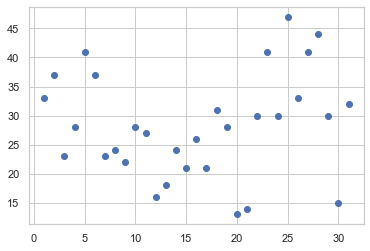

In [22]:
days = df.index
plt.scatter(days,df["Jan"])

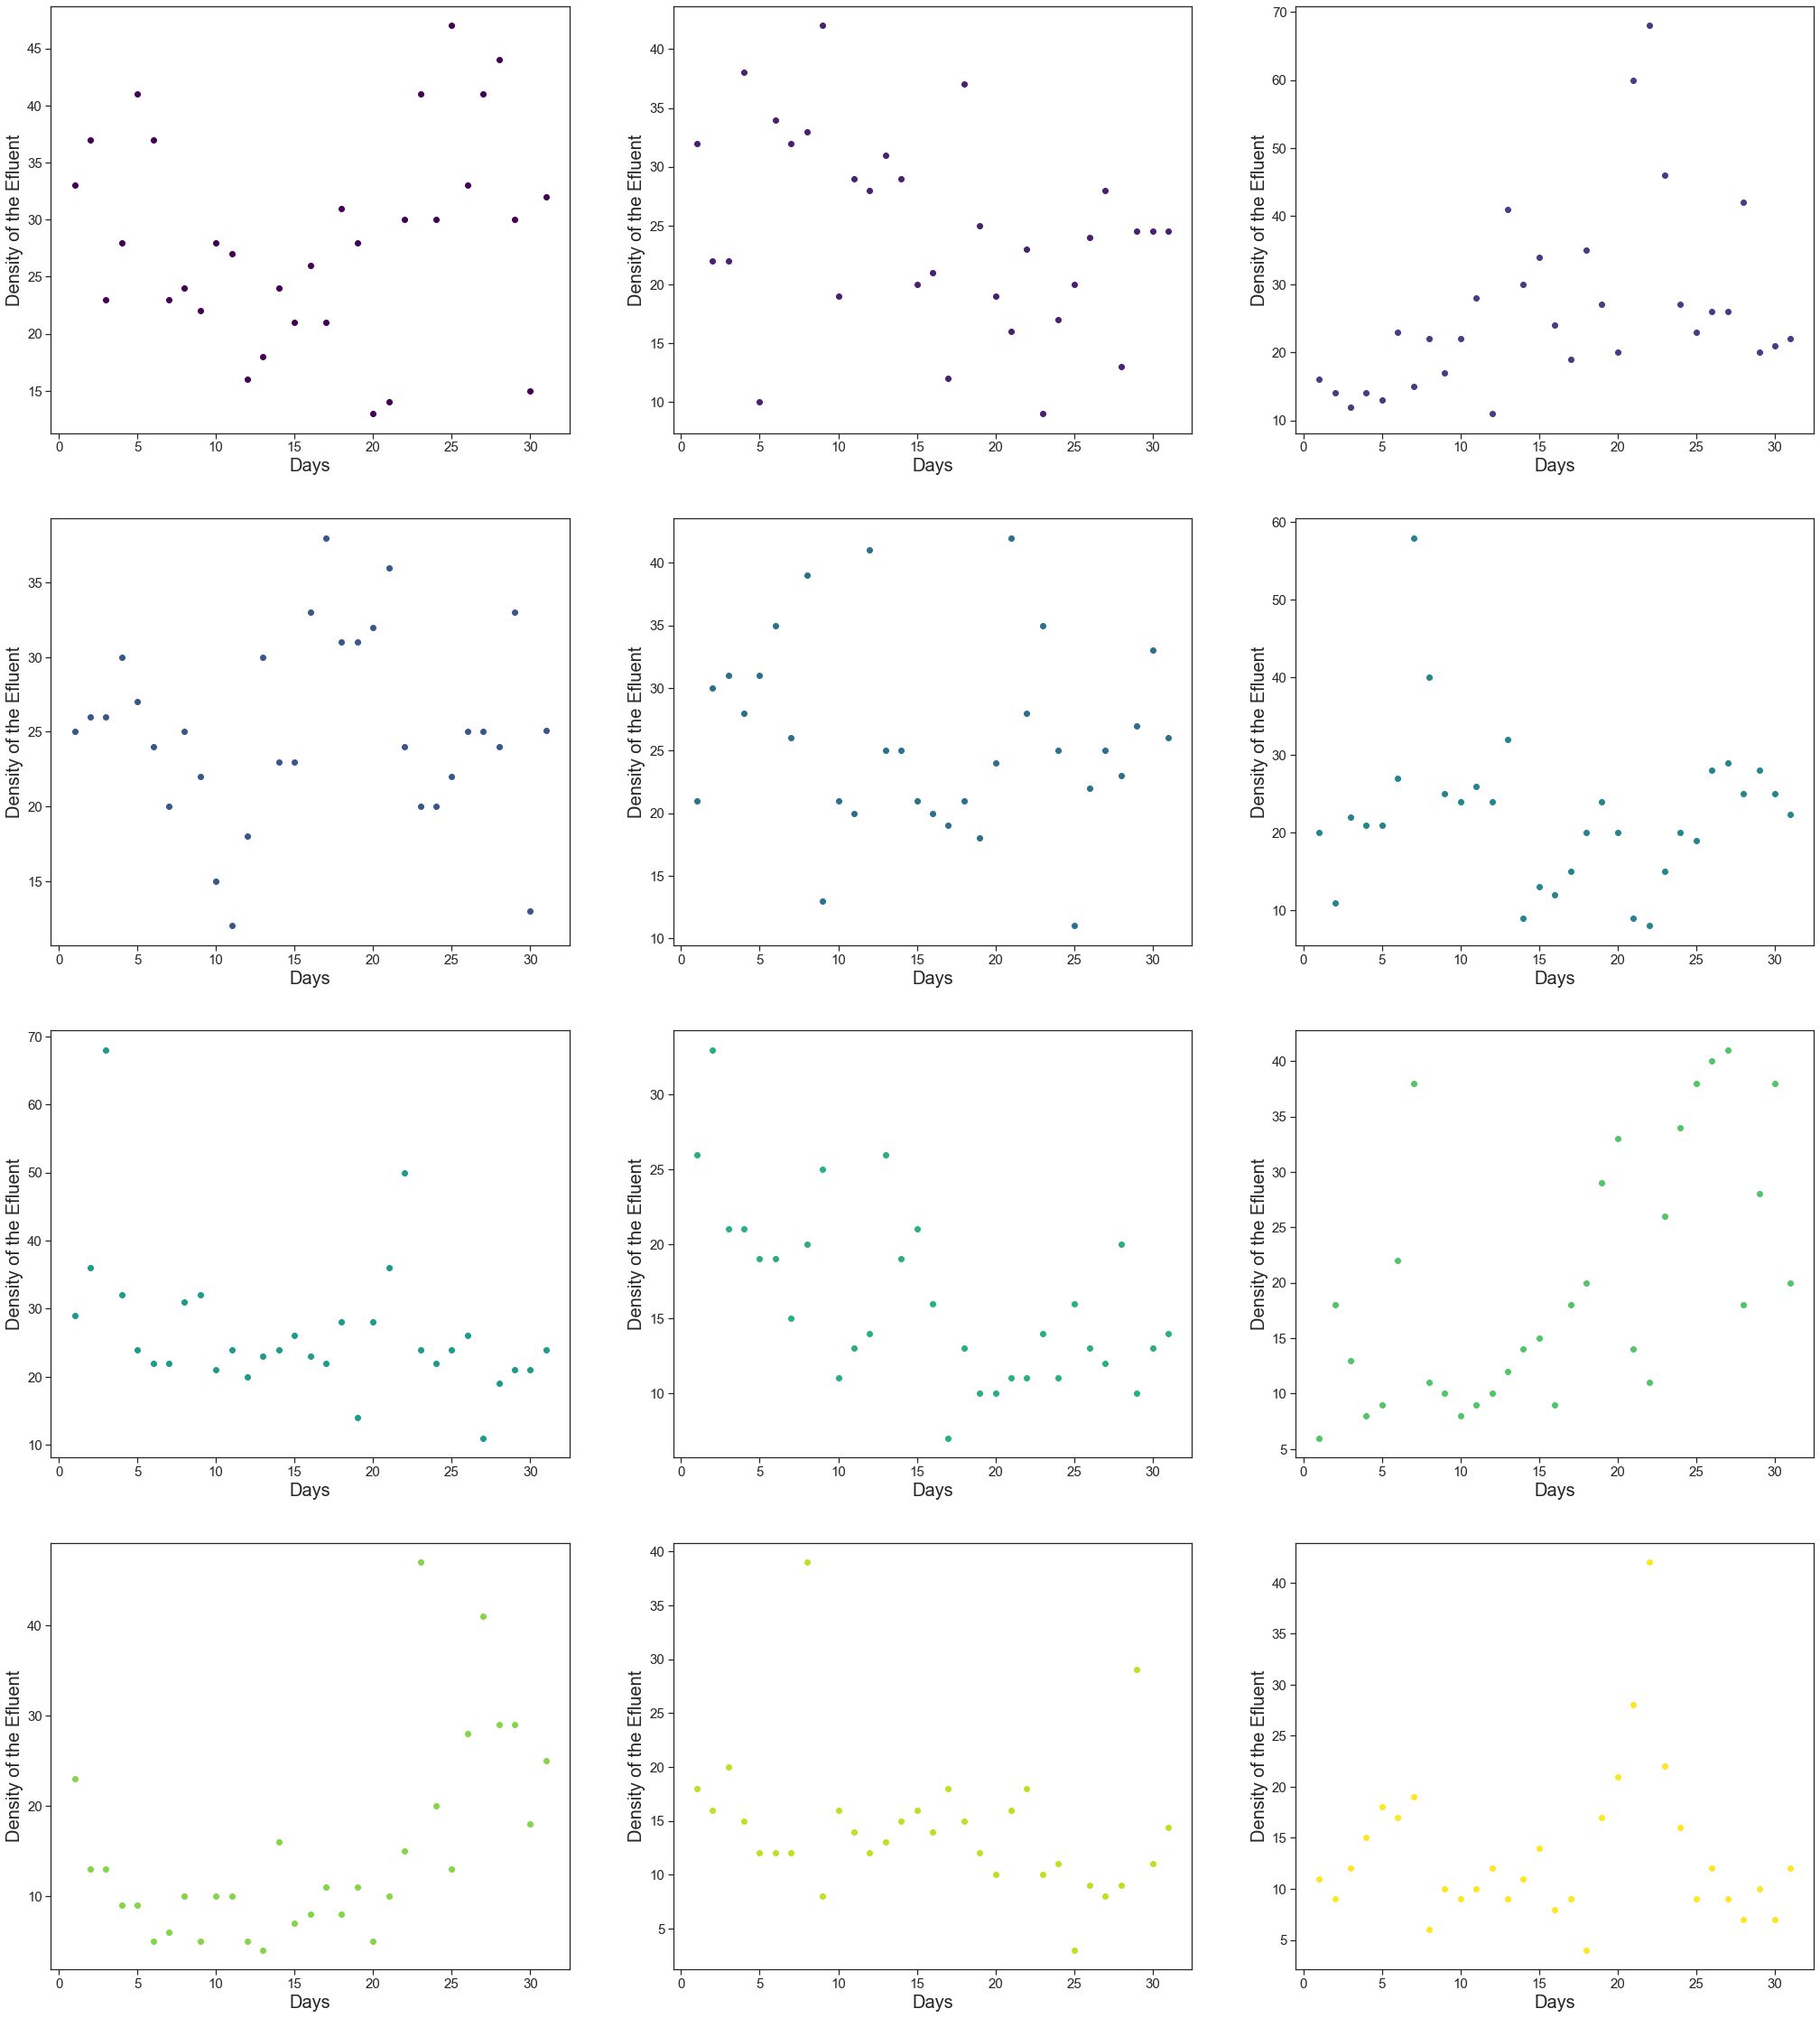

In [23]:
l = len(df.columns)
cols = df.columns
plt.figure(figsize = (35,40))
cmap = get_cmap(l)
with sns.axes_style("ticks"):
    for i in range(0,l):
        plt.subplot(4,3,i+1)
        plt.scatter(days.astype(int),df[cols[i]],color = cmap(i))
        plt.ylabel('Density of the Efluent',fontsize = 20)
        plt.xlabel('Days',fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)

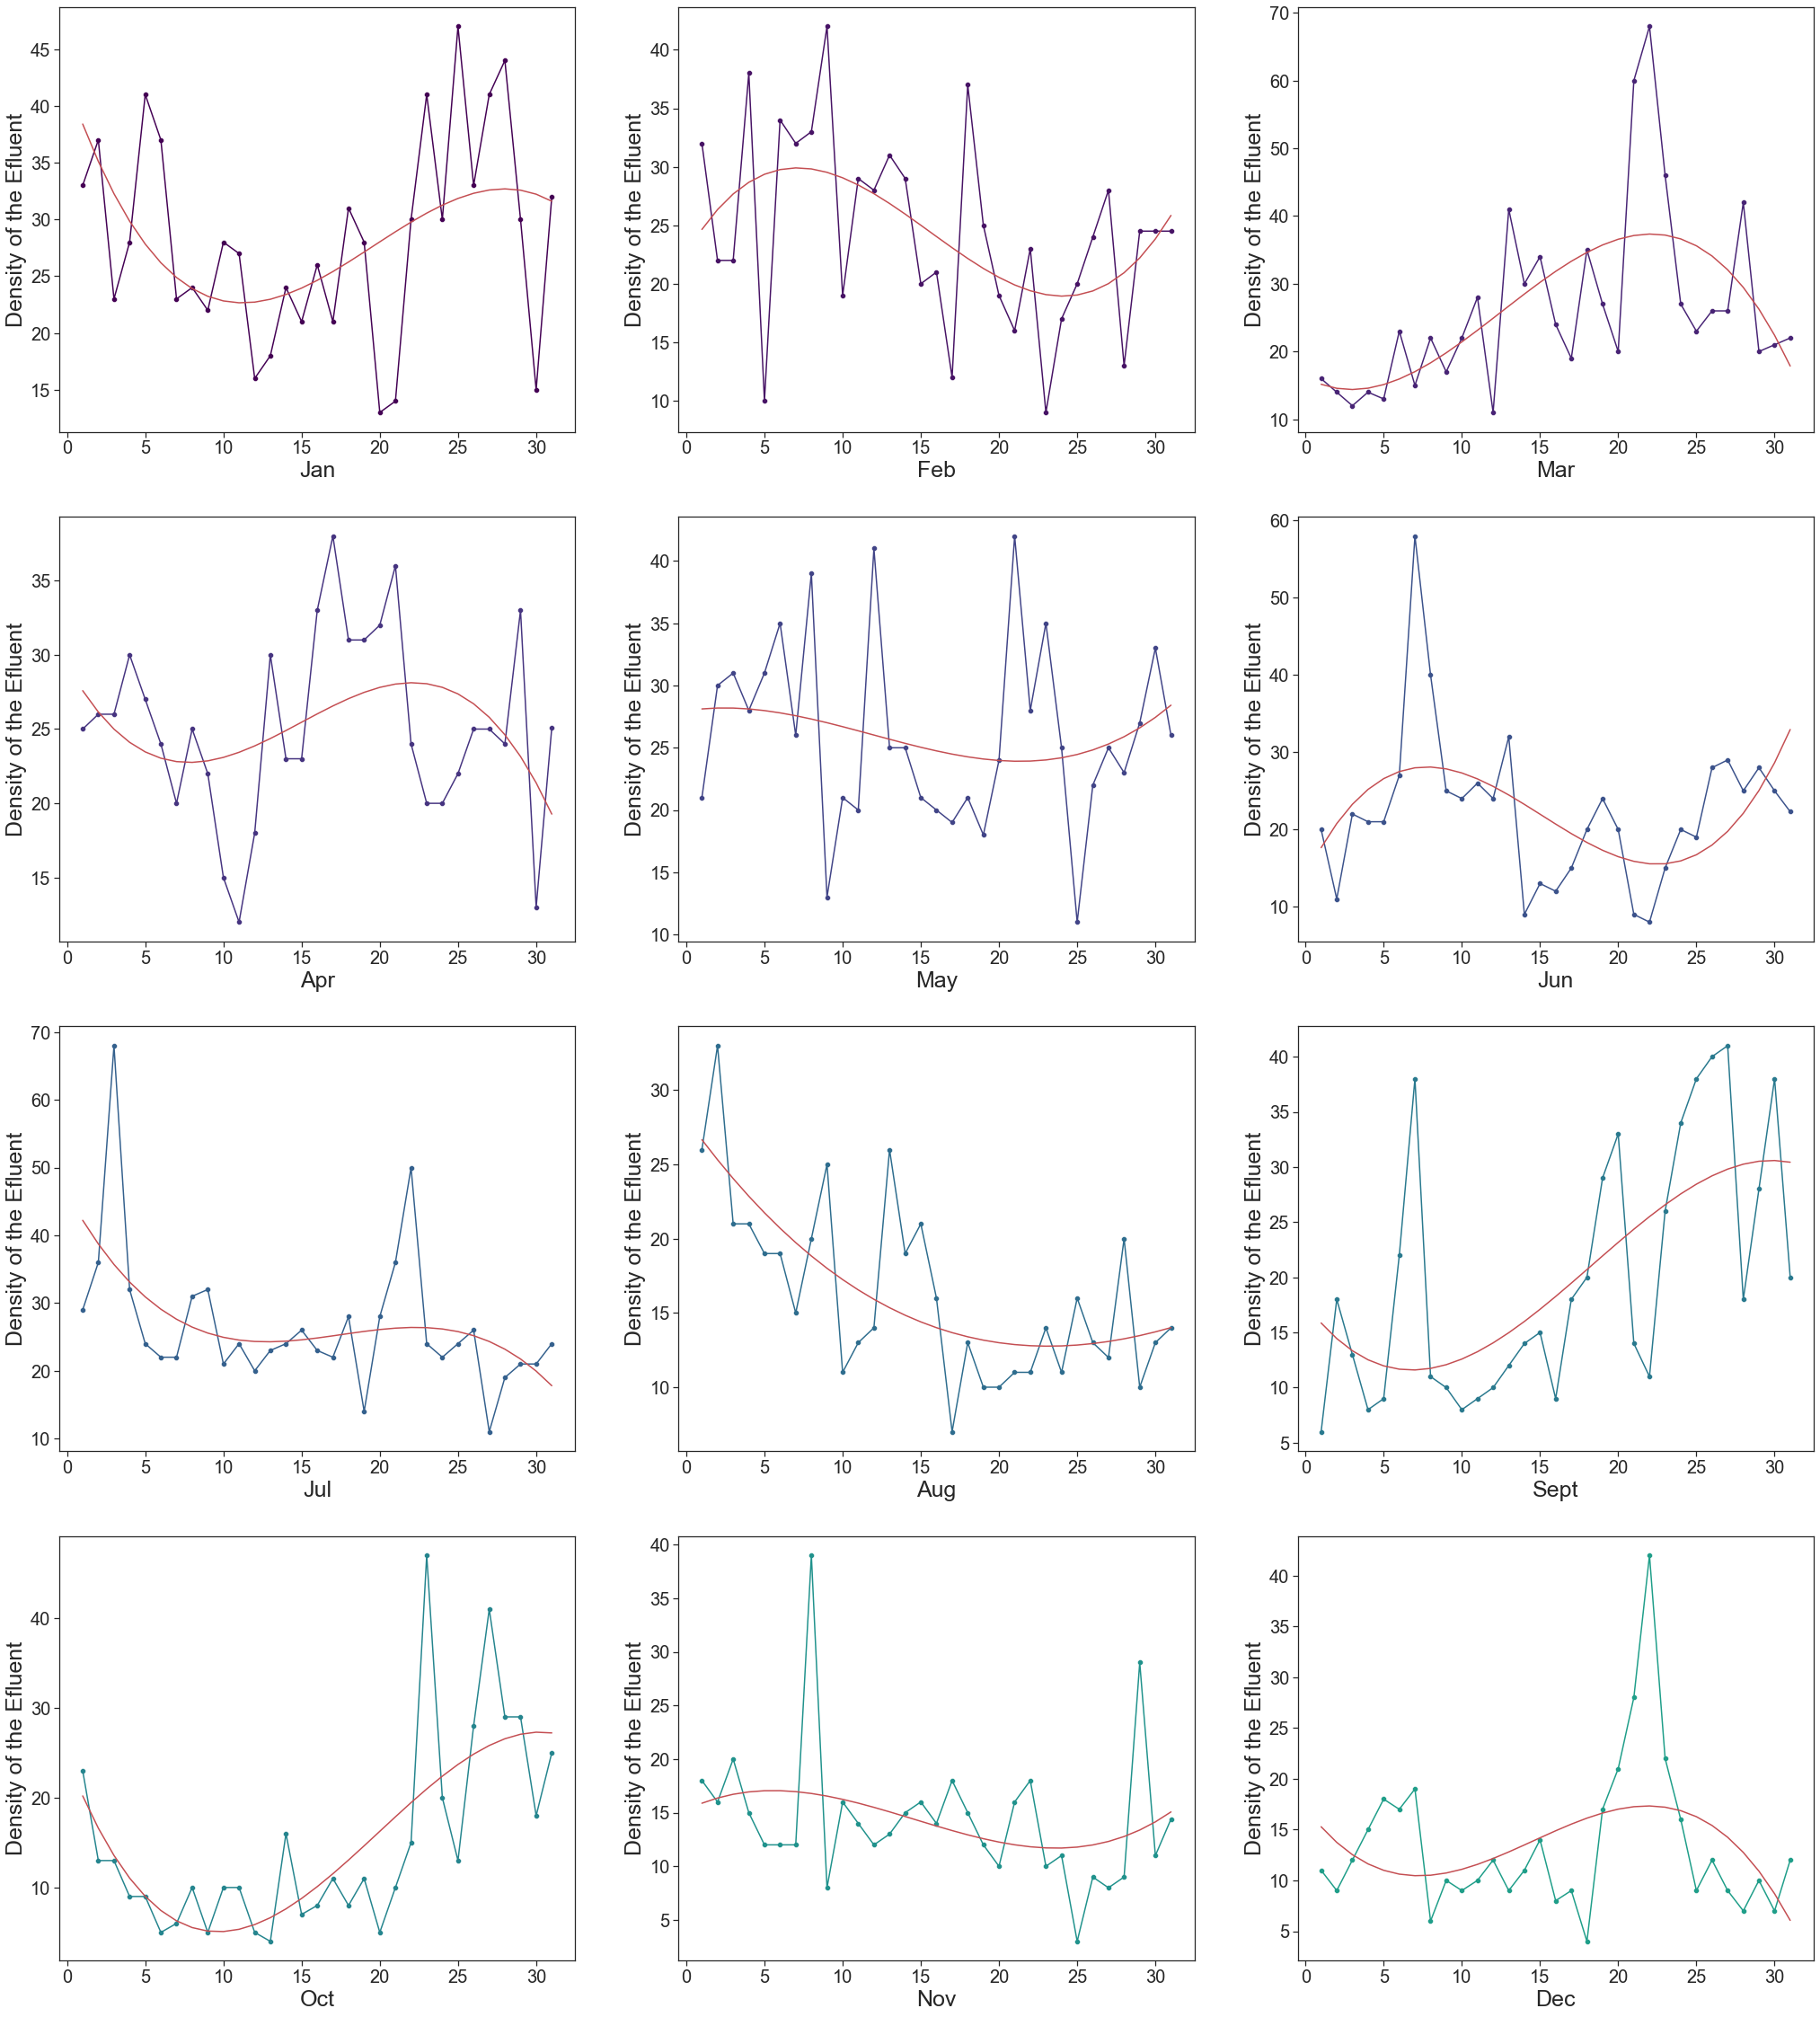

In [24]:
import random
l = len(df.columns)
cols = df.columns
plt.figure(figsize = (35,40))
cmap = get_cmap(100)
with sns.axes_style("whitegrid"):
    with sns.axes_style("ticks"):
        for i in range(0,l):
            plt.subplot(4,3,i+1)
            plt.grid()

            sns.lineplot( x = days.astype(int) ,y = df[cols[i]],color = cmap(i*5))
            sns.scatterplot(x = days.astype(int) ,y = df[cols[i]],color = cmap(i*5))
            x = days.astype(int)
            y = df[cols[i]]
            z = np.polyfit(x, y, 3)
            p = np.poly1d(z)
            plt.grid()
            plt.plot(x,p(x),"r")
            plt.ylabel('Density of the Efluent',fontsize = 25)
            plt.xlabel(str(cols[i]),fontsize = 25)

            plt.xticks(fontsize = 20)
            plt.yticks(fontsize = 20)


These are the general trends of change of efluent suspended solid

In [25]:
df_new = pd.DataFrame(df.to_numpy().reshape(-1, 1, order='F'), 
                      columns=['C1'])

In [26]:
df_new

C1
0    33.0
1    37.0
2    23.0
3    28.0
4    41.0
..    ...
367   9.0
368   7.0
369  10.0
370   7.0
371  12.0

[372 rows x 1 columns]

In [27]:
df_new["Days"] = np.array(df_new.index).reshape(df_new.shape[0],1)  + np.ones(df_new.shape[0]).reshape(df_new.shape[0],1) 

In [28]:
df_new.rename(columns = {'C1':'effluent suspended solids'}, inplace = True)

In [29]:
df_new = df_new.iloc[:,[1,0]]

In [30]:
df_new

Days  effluent suspended solids
0      1.0                       33.0
1      2.0                       37.0
2      3.0                       23.0
3      4.0                       28.0
4      5.0                       41.0
..     ...                        ...
367  368.0                        9.0
368  369.0                        7.0
369  370.0                       10.0
370  371.0                        7.0
371  372.0                       12.0

[372 rows x 2 columns]

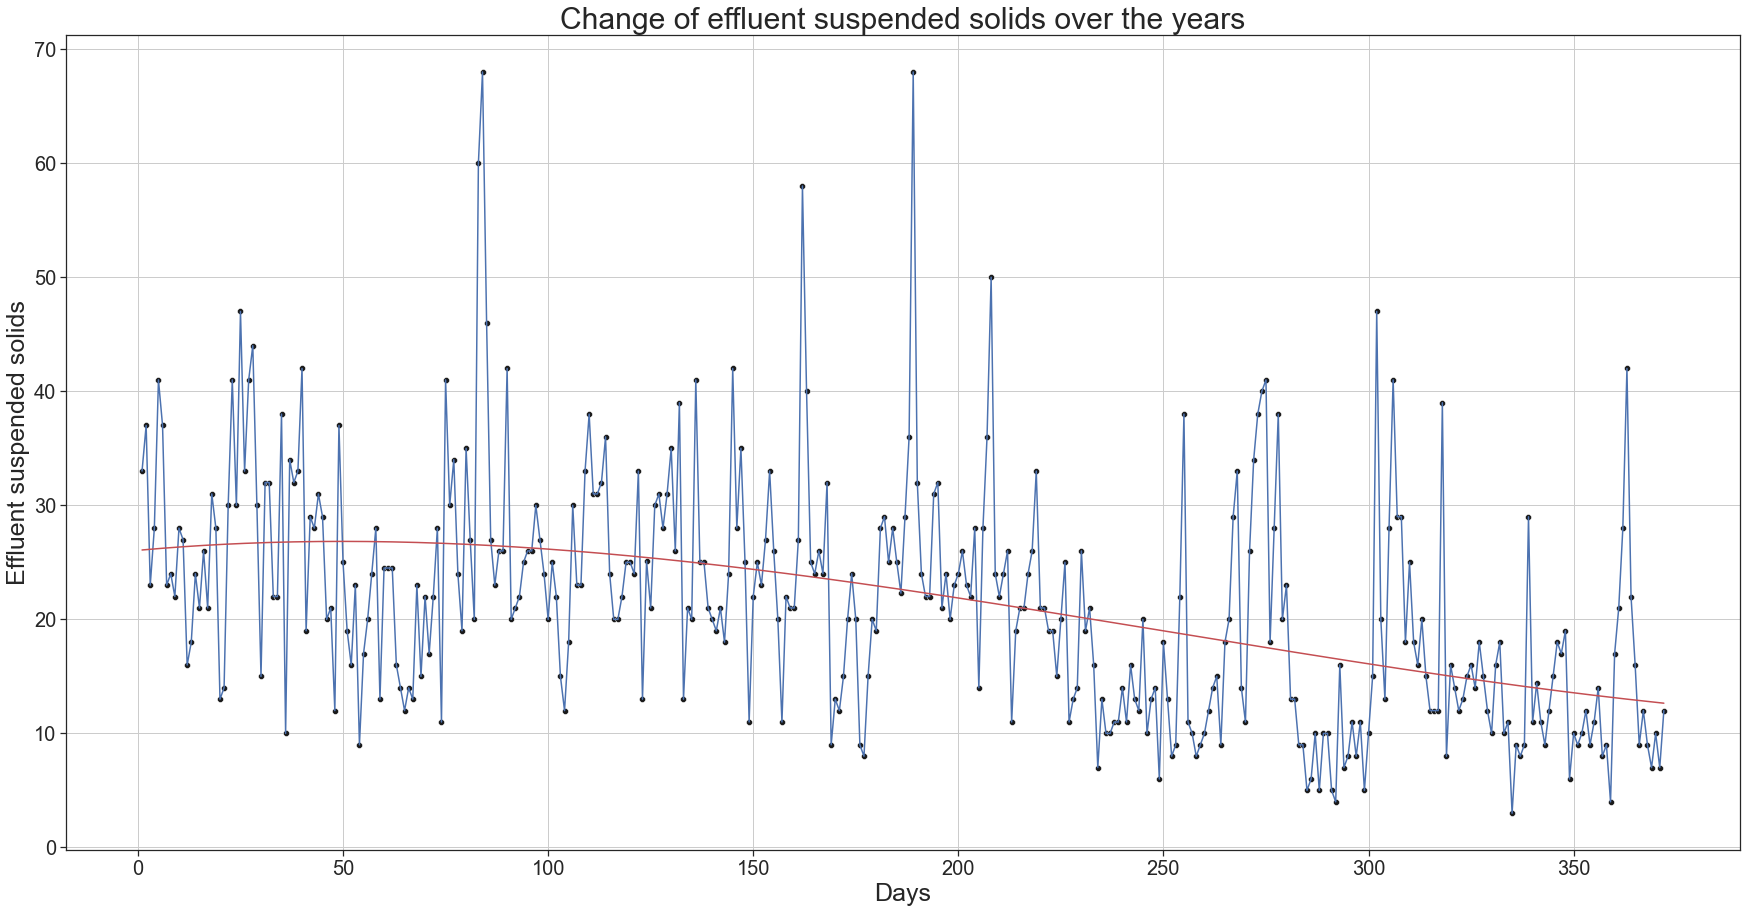

In [31]:
plt.figure(figsize = (30,15))
with sns.axes_style("ticks"):
    sns.lineplot(data = df_new, x= 'Days',y = 'effluent suspended solids');
    sns.scatterplot(x= df_new['Days'],y = df_new['effluent suspended solids'],color= 'k');
    x= df_new['Days']
    y = df_new['effluent suspended solids']
    z = np.polyfit(x,y,3)
    p = np.poly1d(z)
    plt.grid();
    plt.plot(x,p(x),"r");
    plt.ylabel('Effluent suspended solids',fontsize = 25);
    plt.xlabel('Days',fontsize = 25);
    plt.title("Change of effluent suspended solids over the years",fontsize = 30)
    plt.xticks(fontsize = 20);
    plt.yticks(fontsize = 20);

In [32]:
df2 = pd.read_csv('Book1.csv')

In [33]:
df2

Week  Flow (MGD)  BOD (mg/L)
0      1       3.115        1190
1      2       3.080        1211
2      3       4.496        1005
3      4       3.207        1208
4      5       3.881        1349
5      6       4.769        1221
6      7       3.500        1288
7      8       5.373        1193
8      9       3.779        1380
9     10       3.113        1168
10    11       4.008        1250
11    12       3.455        1437
12    13       3.106        1105
13    14       3.583        1155
14    15       3.889        1278
15    16       4.721        1046
16    17       4.241        1068
17    18       3.420        1143
18    19       3.276        1213
19    20       3.595        1300
20    21       4.377        1245
21    22       3.280        1211
22    23       3.986        1148
23    24       3.838        1258
24    25       3.424        1289
25    26       3.794        1147
26    27       2.903        1169
27    28       1.055        1102
28    29       2.931        1000
29    30       2.680        1372
30    31       2.048        1077
31    32       2.548        1324
32    33       1.457        1063
33    34       1.680        1242
34    35       2.434        1167
35    36       2.484        1042
36    37       2.466        1116
37    38       2.690        1228
38    39       2.026        1156
39    40       1.004        1073
40    41       1.769        1259
41    42       1.630        1337
42    43       2.670        1228
43    44       1.416        1107
44    45       2.164        1298
45    46       2.559        1284
46    47       1.735        1064
47    48       2.073        1245
48    49       1.641        1199
49    50       2.991        1279
50    51       3.031        1203
51    52       2.972        1197

<Figure size 1800x1080 with 0 Axes>

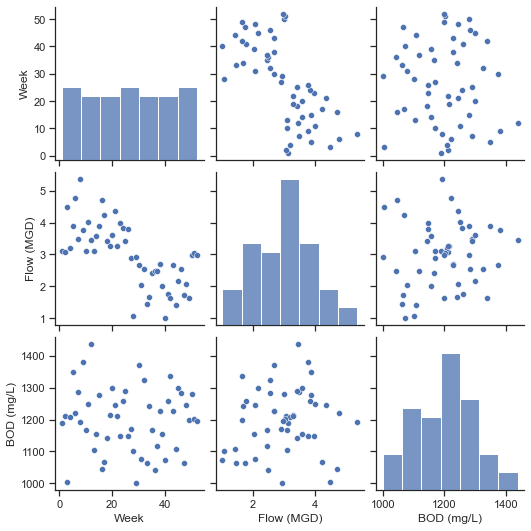

In [34]:
with sns.axes_style("ticks"):
    plt.figure(figsize = (25,15))
    sns.pairplot(df2)

In [35]:
np.var(df2['Flow (MGD)'])

0.9784048798076928

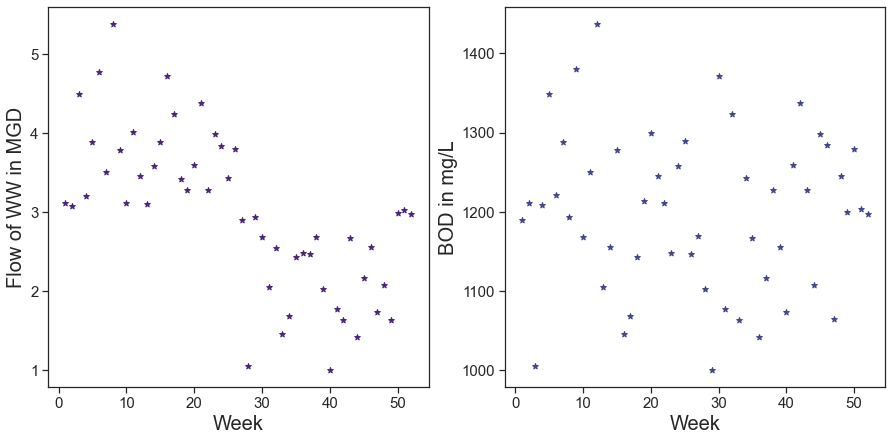

In [36]:
l = len(df2.columns)
cols = df2.columns
plt.figure(figsize = (15,7))
cmap = get_cmap(100)
y_label = ['Flow of WW in MGD','BOD in mg/L']
with sns.axes_style("ticks"):
    for i in range(1,l):
        plt.subplot(1,2,i)
        plt.scatter(df2['Week'],df2[cols[i]],color = cmap(i*10),marker='*')
        plt.ylabel(y_label[i-1],fontsize = 20)
        plt.xlabel('Week',fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)

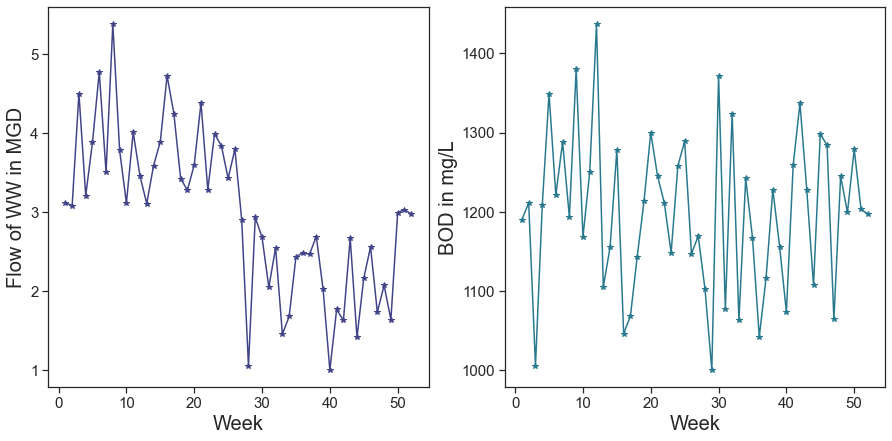

In [38]:
l = len(df2.columns)
cols = df2.columns
plt.figure(figsize = (15,7))
cmap = get_cmap(100)
y_label = ['Flow of WW in MGD','BOD in mg/L']
with sns.axes_style("ticks"):
    for i in range(1,l):
        plt.subplot(1,2,i)
        plt.plot(df2['Week'],df2[cols[i]],color = cmap(i*20),marker='*')
        plt.ylabel(y_label[i-1],fontsize = 20)
        plt.xlabel('Week',fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)

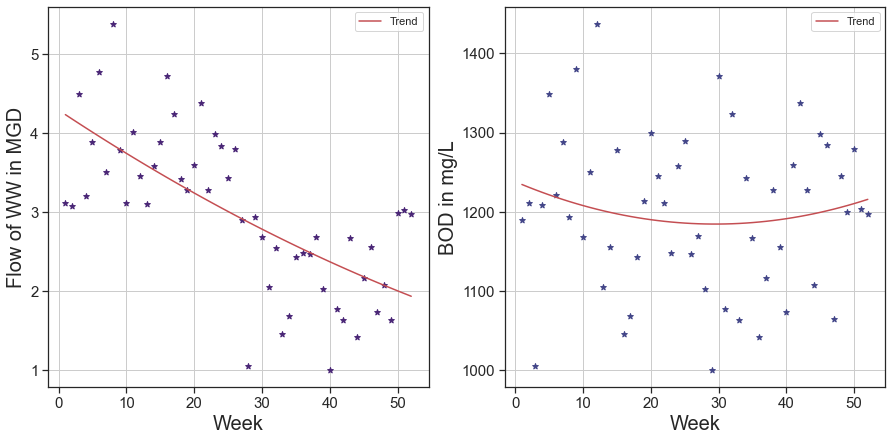

In [44]:
l = len(df2.columns)
cols = df2.columns
plt.figure(figsize = (15,7))
cmap = get_cmap(100)
y_label = ['Flow of WW in MGD','BOD in mg/L']
with sns.axes_style("ticks"):
    for i in range(1,l):
        plt.subplot(1,2,i)
        plt.scatter(df2['Week'],df2[cols[i]],color = cmap(i*10),marker='*')
        x= df2['Week']
        y = df2[cols[i]]
        z = np.polyfit(x,y,2)
        p = np.poly1d(z)
        plt.grid();
        plt.plot(x,p(x),"r",label = 'Trend');
        plt.ylabel(y_label[i-1],fontsize = 20)
        plt.xlabel('Week',fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.legend()

There is no fixed pattern in BOD but there is a pattern in Flow of WW , it seems to be decreased over time, but even after that there is no such improvement in BOD's changing pattern

In [45]:
x1 = np.var(df2['Flow (MGD)'])
xy=np.cov(df2[['Flow (MGD)','BOD (mg/L)']])

In [46]:
xy = sum((df2['Flow (MGD)'] - df2['Flow (MGD)'].mean())*(df2['BOD (mg/L)'] - df2['BOD (mg/L)'].mean()))//df2.shape[0]

In [47]:
x2 = np.std(df2['Flow (MGD)'])

In [48]:
y2 = np.std(df2['BOD (mg/L)'])

In [49]:
corr = xy/x2*y2

In [50]:
corr

1100.968329900653

<AxesSubplot:>

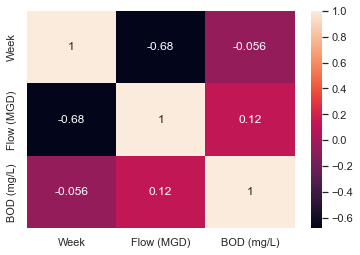

In [51]:
sns.heatmap(df2.corr(),annot = True)

# Q3

In [146]:
df3 = pd.read_csv('Q3.csv')

In [147]:
df3 = pd.DataFrame(df3)

In [148]:
df3

From Date           To Date  PM_{2.5} PM_{10}    NOx SO_{2}     RH  \
0   01-11-2022 00:00  02-11-2022 00:00     69.38  111.85  41.54  10.42  68.47   
1   02-11-2022 00:00  03-11-2022 00:00     74.14  110.71  42.88  10.48  71.07   
2   03-11-2022 00:00  04-11-2022 00:00     63.24   109.4  45.18  10.47  69.55   
3   04-11-2022 00:00  05-11-2022 00:00     52.67   95.82  42.18  10.43  65.43   
4   05-11-2022 00:00  06-11-2022 00:00     58.00   97.55  45.06  10.42   63.5   
5   06-11-2022 00:00  07-11-2022 00:00     63.56  105.61  49.01  10.47  66.64   
6   07-11-2022 00:00  08-11-2022 00:00     23.18   56.23   30.2   3.23  98.19   
7   08-11-2022 00:00  09-11-2022 00:00     57.65  102.71  45.38   8.38  77.57   
8   09-11-2022 00:00  10-11-2022 00:00     84.13   138.9  51.34  10.55  76.19   
9   10-11-2022 00:00  11-11-2022 00:00     73.52  120.18   46.8  10.63  72.71   
10  11-11-2022 00:00  12-11-2022 00:00     70.28  111.39  40.52  10.39   68.3   
11  12-11-2022 00:00  13-11-2022 00:00     76.78  120.13     41  10.44  66.59   
12  13-11-2022 00:00  14-11-2022 00:00     78.54  117.02  37.39  10.39  68.73   
13  14-11-2022 00:00  15-11-2022 00:00     97.51  145.51  47.01  10.52  75.98   
14  15-11-2022 00:00  16-11-2022 00:00    105.16  149.63   49.9  10.61  80.75   
15  16-11-2022 00:00  17-11-2022 00:00     86.51  130.93  49.32  10.62  76.45   
16  17-11-2022 00:00  18-11-2022 00:00     70.88  110.56  43.97  10.42   68.3   
17  18-11-2022 00:00  19-11-2022 00:00     46.44    82.3  37.94  10.36  55.89   
18  19-11-2022 00:00  20-11-2022 00:00     55.79   93.01  42.33  10.43  59.06   
19  20-11-2022 00:00  21-11-2022 00:00     54.20    91.8  41.36   10.5  59.68   
20  21-11-2022 00:00  22-11-2022 00:00     65.05  106.77  43.06  10.45  59.99   
21  22-11-2022 00:00  23-11-2022 00:00     82.98  129.26  48.35  10.47  67.59   
22  23-11-2022 00:00  24-11-2022 00:00     83.92  129.61  46.94   10.5  66.55   
23  24-11-2022 00:00  25-11-2022 00:00     98.68  155.86  55.11  10.59  74.37   
24  25-11-2022 00:00  26-11-2022 00:00    106.58  170.01  57.63  10.68  76.27   
25  26-11-2022 00:00  27-11-2022 00:00    117.43  176.05  59.94   9.94  79.13   
26  27-11-2022 00:00  28-11-2022 00:00    107.13  153.74   None   9.12  81.43   
27  28-11-2022 00:00  29-11-2022 00:00     63.15   92.79   None   9.15  78.37   
28  29-11-2022 00:00  30-11-2022 00:00     68.96  113.69   None   9.09  77.69   
29  30-11-2022 00:00  30-11-2022 00:00     70.44    None   None   None   None   

       AT  
0   24.74  
1   25.52  
2   25.68  
3   26.02  
4   26.16  
5    26.2  
6   25.89  
7   27.42  
8   25.72  
9   26.17  
10  25.84  
11  26.04  
12   26.3  
13  25.98  
14  25.87  
15  25.69  
16  25.85  
17  25.53  
18  24.93  
19  24.49  
20  23.74  
21  24.41  
22  25.31  
23  25.24  
24  26.04  
25  26.84  
26  26.24  
27  25.17  
28  23.71  
29   None

In [149]:
df3 = df3.replace('None', np.nan)
df3.isnull().sum()

From Date    0
To Date      0
PM_{2.5}     0
PM_{10}      1
NOx          4
SO_{2}       1
RH           1
AT           1
dtype: int64

In [150]:
df3 = df3.dropna(thresh=6)

In [161]:
df3.isnull().sum()

From Date    0
To Date      0
PM_{2.5}     0
PM_{10}      0
NOx          0
SO_{2}       0
RH           0
AT           0
dtype: int64

In [159]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  29 non-null     datetime64[ns]
 1   To Date    29 non-null     datetime64[ns]
 2   PM_{2.5}   29 non-null     float64       
 3   PM_{10}    29 non-null     float64       
 4   NOx        26 non-null     float64       
 5   SO_{2}     29 non-null     float64       
 6   RH         29 non-null     float64       
 7   AT         29 non-null     float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 2.0 KB


In [153]:
df3[['From Date','To Date']] = df3[['From Date','To Date']].astype('datetime64')

In [157]:
df3['NOx'].astype(float).describe()

count    26.000000
mean     45.436154
std       6.368261
min      30.200000
25%      41.700000
50%      45.120000
75%      48.845000
max      59.940000
Name: NOx, dtype: float64

In [155]:
df3

From Date    To Date  PM_{2.5} PM_{10}    NOx SO_{2}     RH     AT
0  2022-01-11 2022-02-11     69.38  111.85  41.54  10.42  68.47  24.74
1  2022-02-11 2022-03-11     74.14  110.71  42.88  10.48  71.07  25.52
2  2022-03-11 2022-04-11     63.24   109.4  45.18  10.47  69.55  25.68
3  2022-04-11 2022-05-11     52.67   95.82  42.18  10.43  65.43  26.02
4  2022-05-11 2022-06-11     58.00   97.55  45.06  10.42   63.5  26.16
5  2022-06-11 2022-07-11     63.56  105.61  49.01  10.47  66.64   26.2
6  2022-07-11 2022-08-11     23.18   56.23   30.2   3.23  98.19  25.89
7  2022-08-11 2022-09-11     57.65  102.71  45.38   8.38  77.57  27.42
8  2022-09-11 2022-10-11     84.13   138.9  51.34  10.55  76.19  25.72
9  2022-10-11 2022-11-11     73.52  120.18   46.8  10.63  72.71  26.17
10 2022-11-11 2022-12-11     70.28  111.39  40.52  10.39   68.3  25.84
11 2022-12-11 2022-11-13     76.78  120.13     41  10.44  66.59  26.04
12 2022-11-13 2022-11-14     78.54  117.02  37.39  10.39  68.73   26.3
13 2022-11-14 2022-11-15     97.51  145.51  47.01  10.52  75.98  25.98
14 2022-11-15 2022-11-16    105.16  149.63   49.9  10.61  80.75  25.87
15 2022-11-16 2022-11-17     86.51  130.93  49.32  10.62  76.45  25.69
16 2022-11-17 2022-11-18     70.88  110.56  43.97  10.42   68.3  25.85
17 2022-11-18 2022-11-19     46.44    82.3  37.94  10.36  55.89  25.53
18 2022-11-19 2022-11-20     55.79   93.01  42.33  10.43  59.06  24.93
19 2022-11-20 2022-11-21     54.20    91.8  41.36   10.5  59.68  24.49
20 2022-11-21 2022-11-22     65.05  106.77  43.06  10.45  59.99  23.74
21 2022-11-22 2022-11-23     82.98  129.26  48.35  10.47  67.59  24.41
22 2022-11-23 2022-11-24     83.92  129.61  46.94   10.5  66.55  25.31
23 2022-11-24 2022-11-25     98.68  155.86  55.11  10.59  74.37  25.24
24 2022-11-25 2022-11-26    106.58  170.01  57.63  10.68  76.27  26.04
25 2022-11-26 2022-11-27    117.43  176.05  59.94   9.94  79.13  26.84
26 2022-11-27 2022-11-28    107.13  153.74    NaN   9.12  81.43  26.24
27 2022-11-28 2022-11-29     63.15   92.79    NaN   9.15  78.37  25.17
28 2022-11-29 2022-11-30     68.96  113.69    NaN   9.09  77.69  23.71

In [160]:
df3['NOx'] = df3['NOx'].fillna(df3['NOx'].mean())

mean and median are near about same so we can replace the missing data with mean values. 

In [156]:
df3_box = df3[['PM_{2.5}','PM_{10}','NOx','SO_{2}','RH','AT']].astype(float)

In [158]:
df3[['PM_{2.5}','PM_{10}','NOx','SO_{2}','RH','AT']] = df3[['PM_{2.5}','PM_{10}','NOx','SO_{2}','RH','AT']].astype('float64')

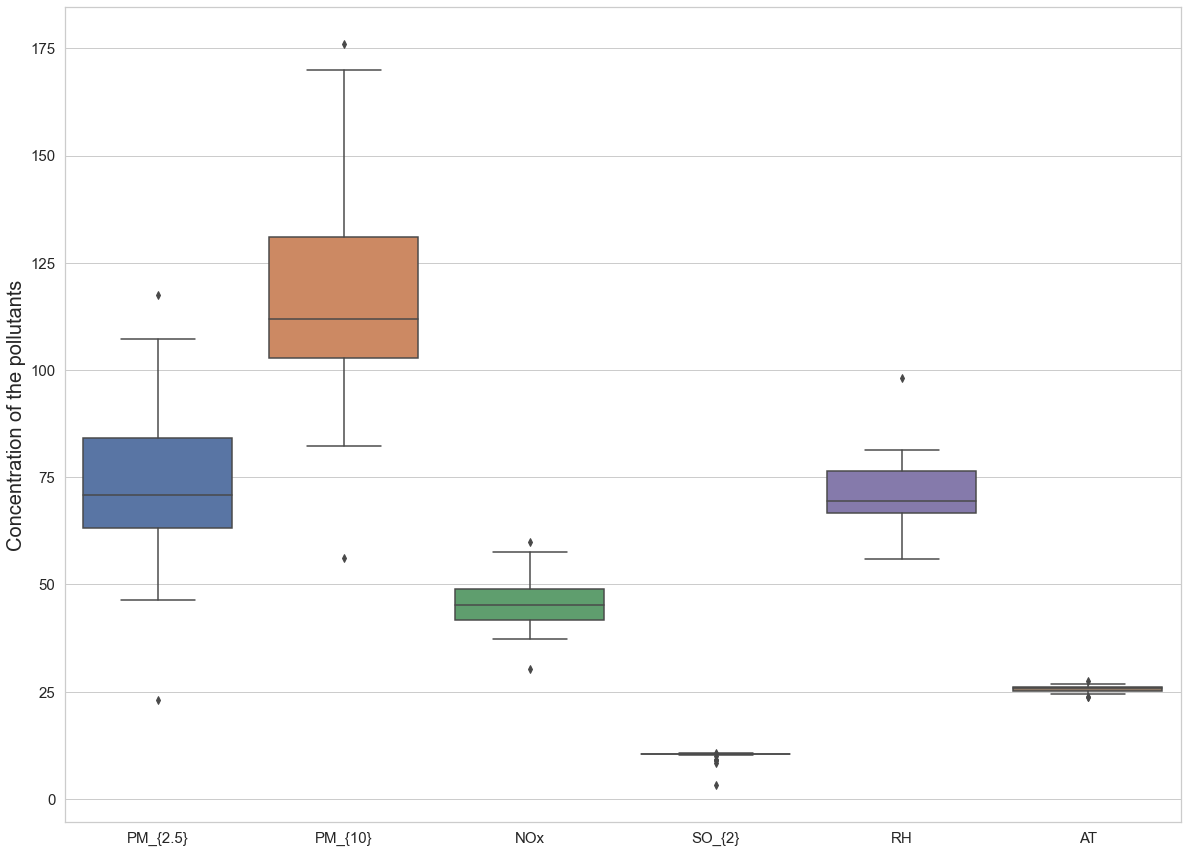

In [142]:
plt.figure(figsize = (20,15))
sns.boxplot(df3_box)
plt.ylabel('Concentration of the pollutants', fontsize = 20)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

The data has some possible outliers in record. 

In [162]:
df3.drop(columns = ['From Date','To Date'],inplace = True)

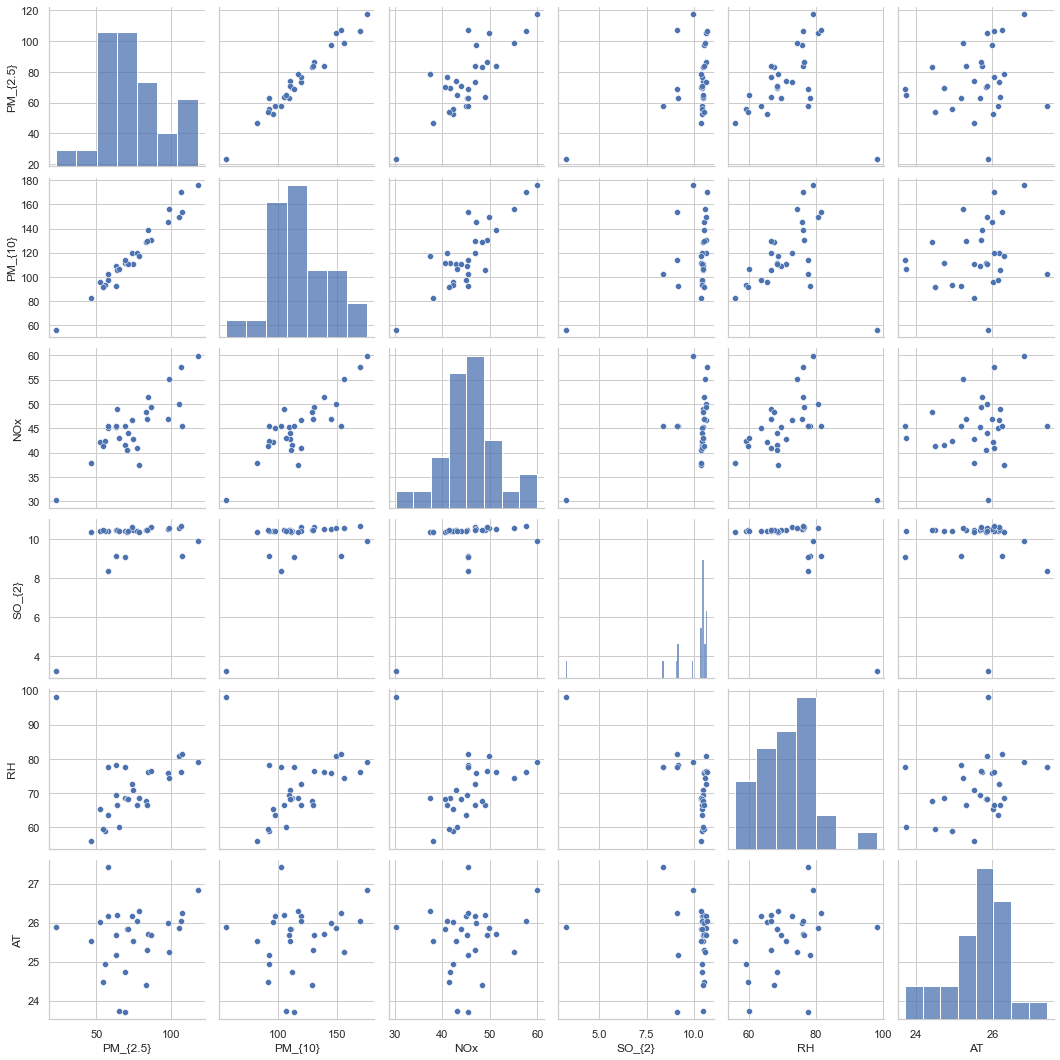

In [163]:
sns.pairplot(df3)

In [96]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df3)
prof.to_file(output_file = 'Q3.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [164]:
df3['Days'] = [(i + 1) for i in range(df3.shape[0])]

In [166]:
df3 = df3.iloc[:,[6,0,1,2,3,4,5]]

In [172]:
polutant = df3.columns
l1 = len(polutant)

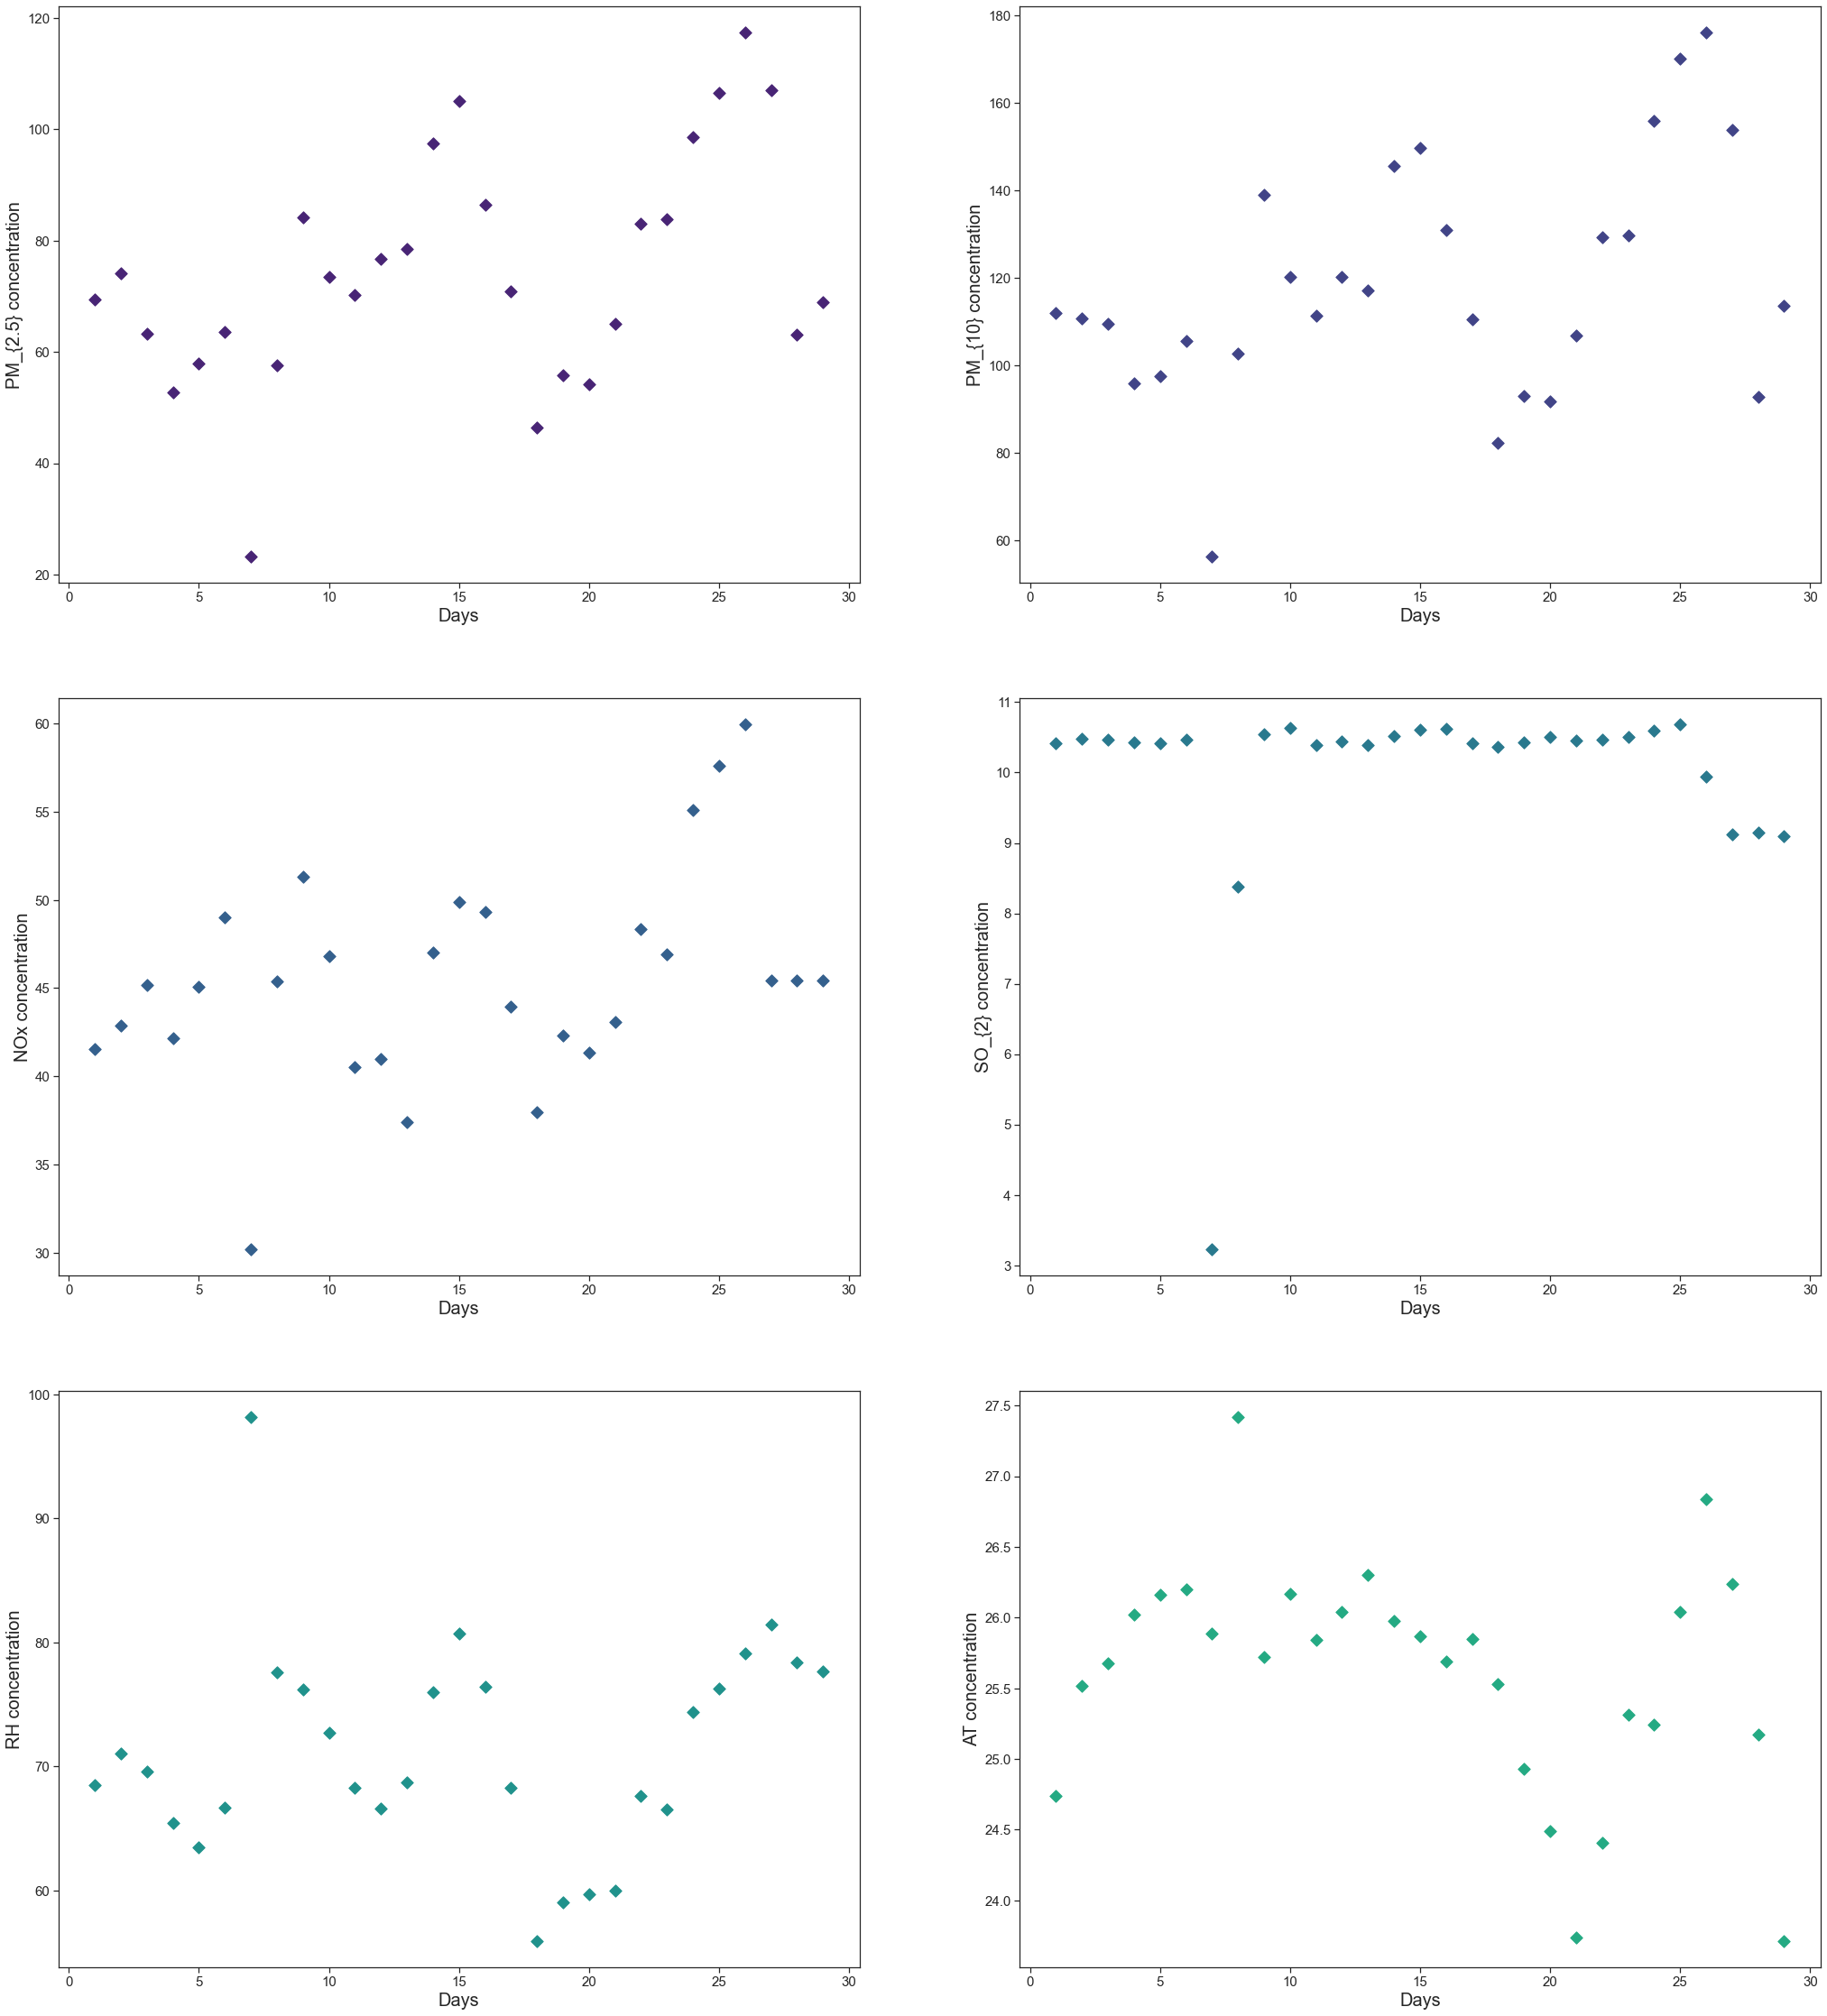

In [182]:
plt.figure(figsize = (35,40))
cmap = get_cmap(100)
with sns.axes_style("ticks"):
    for i in range(1,l1):
        plt.subplot(3,2,i)
        plt.scatter(df3['Days'],df3[polutant[i]],color = cmap(i*10),s =90,marker='D')
        plt.ylabel(polutant[i]+ ' concentration',fontsize = 20)
        plt.xlabel('Days',fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)

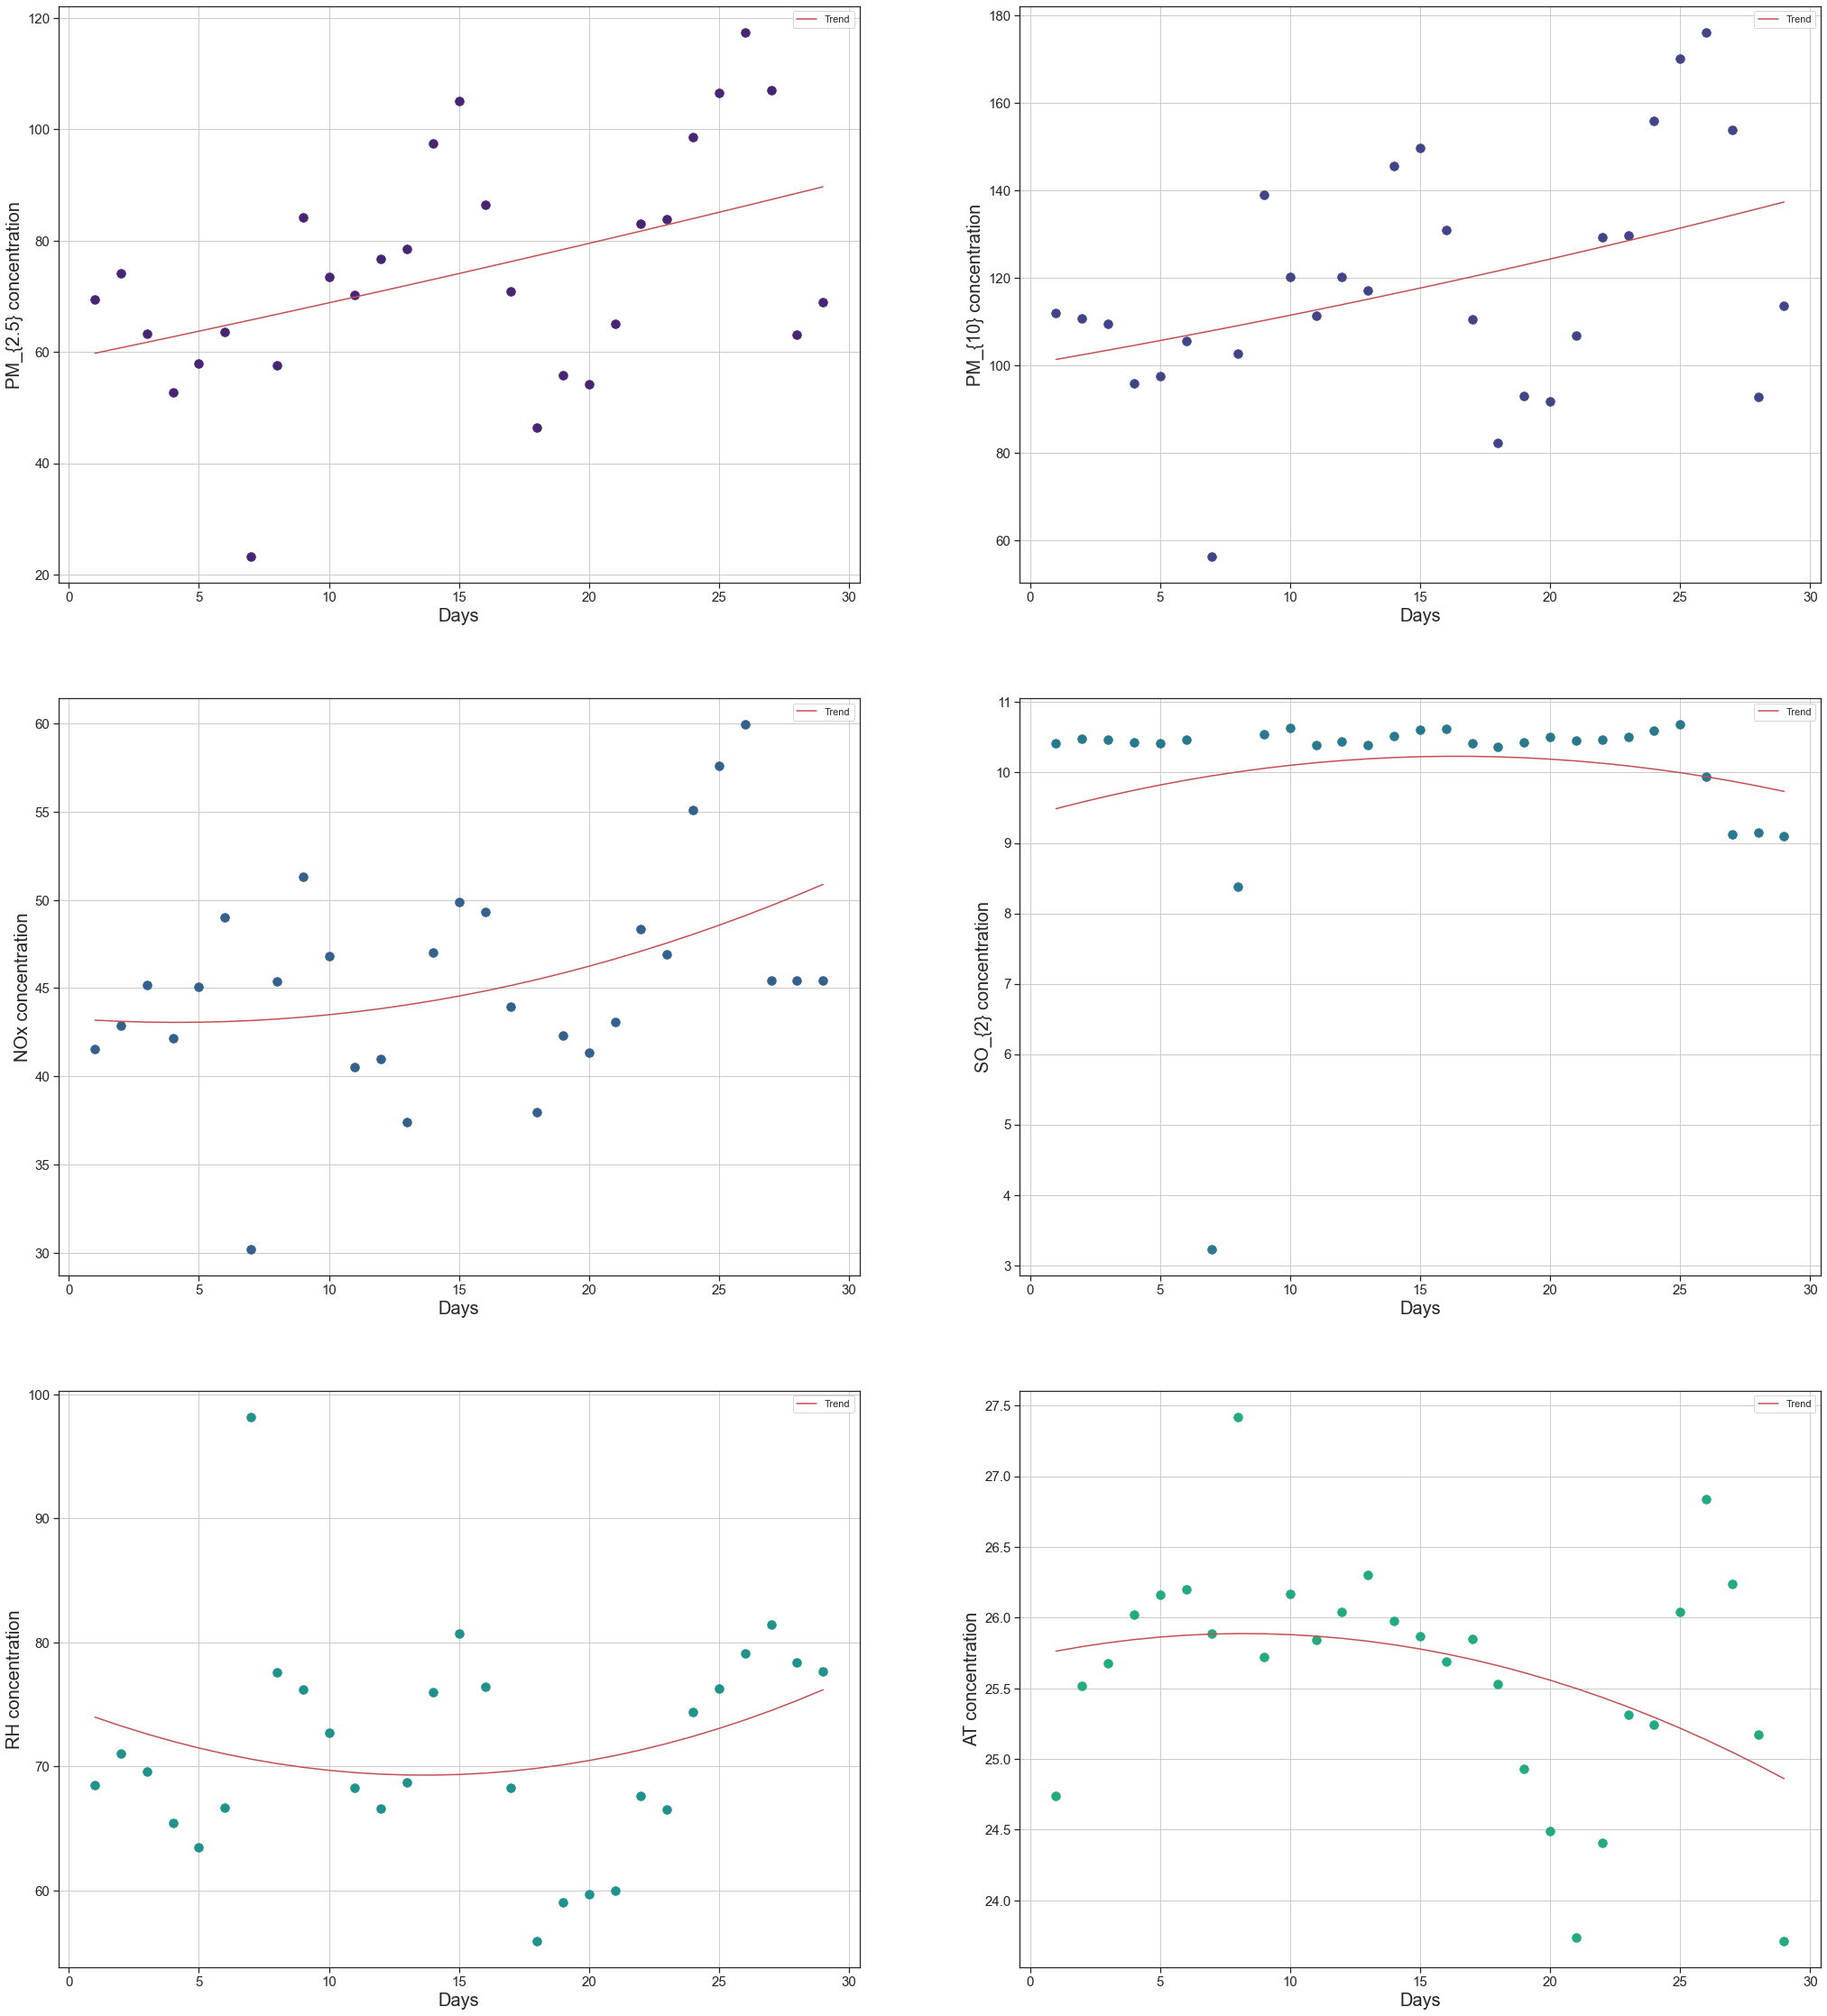

In [183]:
plt.figure(figsize = (35,40))
cmap = get_cmap(100)
with sns.axes_style("ticks"):
    for i in range(1,l1):
        plt.subplot(3,2,i)
        plt.scatter(df3['Days'],df3[polutant[i]],color = cmap(i*10),s =90)
        
        x= df3['Days']
        y = df3[polutant[i]]
        z = np.polyfit(x,y,2)
        p = np.poly1d(z)
        plt.grid();
        plt.plot(x,p(x),"r",label = 'Trend');
        
        
        plt.ylabel(polutant[i]+ ' concentration',fontsize = 20)
        plt.xlabel('Days',fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.legend()

In [185]:
obs_polu = ['PM_{2.5}','PM_{10}']
ind_parm = ['NOx','SO_{2}','RH','AT']
l1 = len(obs_polu)
l2 = len(ind_parm)

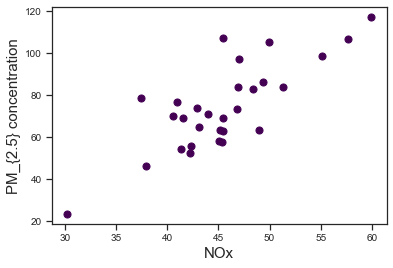

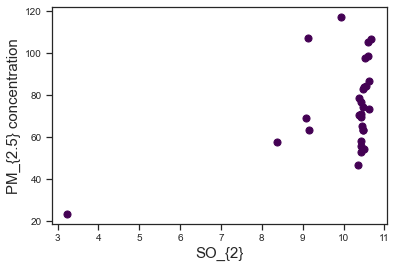

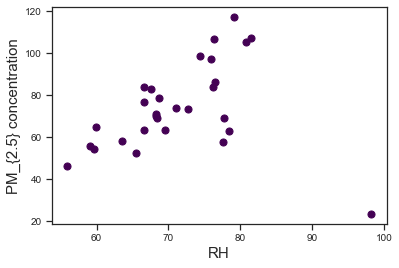

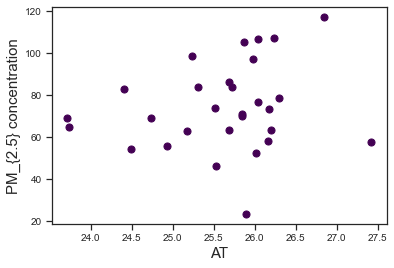

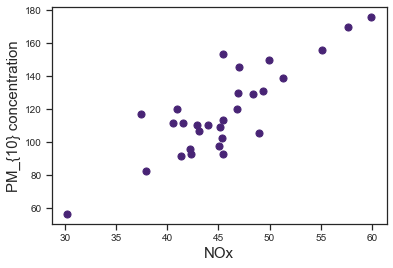

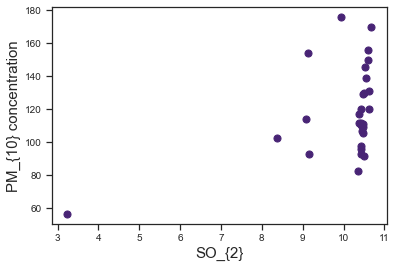

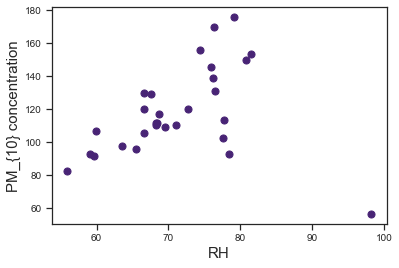

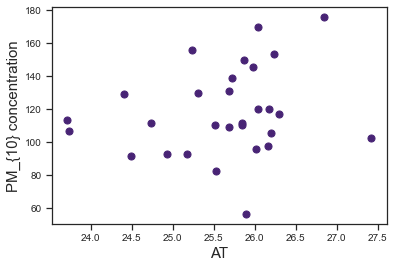

In [217]:
cmap = get_cmap(100)
count = 0
with sns.axes_style("ticks"):
    for i in range(l1):
        for j in range(l2):
            plt.scatter(df3[ind_parm[j]],df3[obs_polu[i]],color = cmap(i*10),s =50)
            plt.ylabel(obs_polu[i]+ ' concentration',fontsize = 15)
            plt.xlabel(ind_parm[j],fontsize = 15)
            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 10)
            plt.savefig('scatter'+str(count), bbox_inches='tight')
            count +=1
            plt.show()
            
            
            

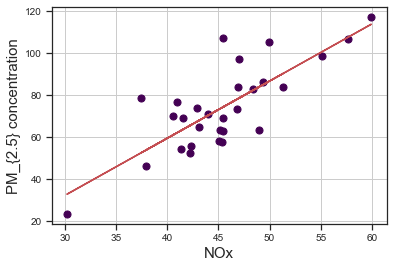

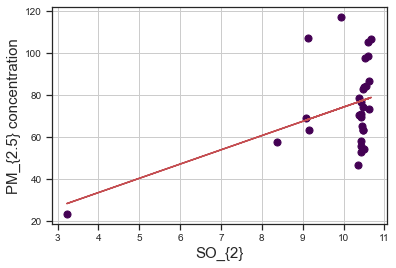

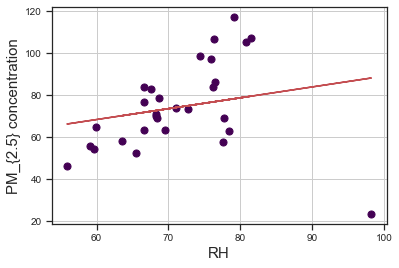

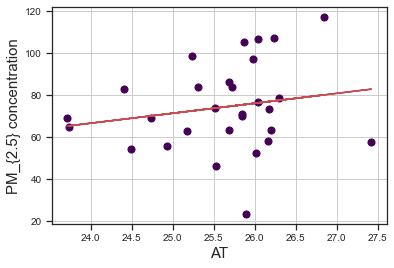

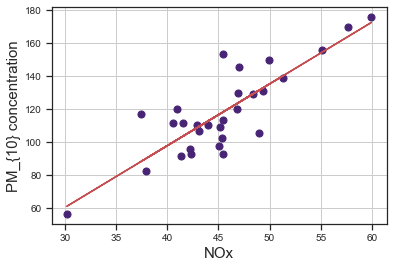

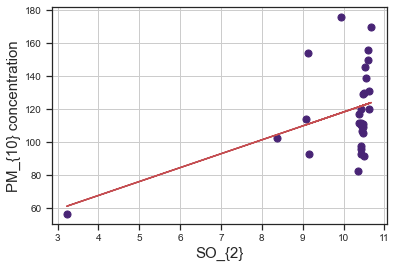

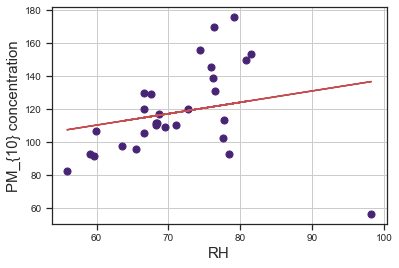

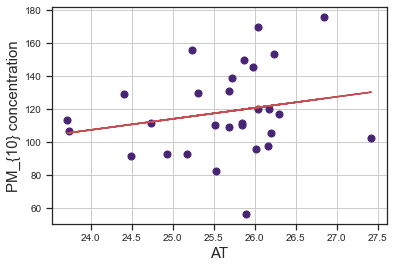

In [218]:
count1 = 0
cmap = get_cmap(100)
with sns.axes_style("ticks"):
    for i in range(l1):
        for j in range(l2):
            plt.scatter(df3[ind_parm[j]],df3[obs_polu[i]],color = cmap(i*10),s =50)
            x= df3[ind_parm[j]]
            y = df3[obs_polu[i]]
            z = np.polyfit(x,y,1)
            p = np.poly1d(z)
            plt.grid();
            plt.plot(x,p(x),"r",label = 'Trend');
            
            plt.ylabel(obs_polu[i]+ ' concentration',fontsize = 15)
            plt.xlabel(ind_parm[j],fontsize = 15)
            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 10)
            plt.savefig('trend'+str(count1), bbox_inches='tight')
            count1 +=1
            plt.show()
            